# Importing the relevant libraries, packages and settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from dataprep.eda import plot, plot_correlation, plot_missing
%autosave 120
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn import tree
import pydotplus
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


NumExpr defaulting to 8 threads.


Autosaving every 120 seconds


# Importing the data

In [2]:
d4TelcoChurn = pd.read_excel(r'TelcoChurn.xlsx')

# Inspecting the data

In [3]:
d4TelcoChurn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
d4TelcoChurn.shape

(7043, 21)

In [5]:
d4TelcoChurn.describe(percentiles=[0.01, 0.05, 0.1,0.25,0.5,0.75,0.9, 0.95, 0.99])

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.798992
std         0.368612    24.559481       30.090047   2266.730170
min         0.000000     0.000000       18.250000     18.800000
1%          0.000000     1.000000       19.200000     19.871000
5%          0.000000     1.000000       19.650000     49.070000
10%         0.000000     2.000000       20.050000     83.470000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
90%         1.000000    69.000000      102.600000   5973.690000
95%         1.000000    72.000000      107.400000   6921.025000
99%         1.000000    72.000000      114.729000   8039.256000
max         1.000000    72.000000      118.750000   8684.800000

In [6]:
d4TelcoChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Observation
#### No null entries detected


# Exploratory Data Analysis

### Inspecting the high difference between 99 percentile and max in Total Charges Column

In [7]:
x = d4TelcoChurn[d4TelcoChurn['TotalCharges'] > 8039.25]
print(x.describe())

       SeniorCitizen     tenure  MonthlyCharges  TotalCharges
count      71.000000  71.000000       71.000000     71.000000
mean        0.169014  71.718310      114.755634   8293.156338
std         0.377432   0.636578        2.171332    171.776337
min         0.000000  69.000000      109.250000   8041.650000
25%         0.000000  72.000000      113.825000   8140.800000
50%         0.000000  72.000000      115.150000   8306.050000
75%         0.000000  72.000000      116.075000   8425.025000
max         1.000000  72.000000      118.750000   8684.800000


In [8]:
y = d4TelcoChurn[d4TelcoChurn['tenure'] >= 69 ]
print(y.describe())

       SeniorCitizen      tenure  MonthlyCharges  TotalCharges
count     746.000000  746.000000      746.000000    746.000000
mean        0.156836   71.071046       77.163874   5488.507373
std         0.363890    1.072684       32.361410   2311.013552
min         0.000000   69.000000       19.100000   1268.850000
25%         0.000000   70.000000       58.275000   4062.362500
50%         0.000000   71.000000       85.450000   6127.650000
75%         0.000000   72.000000      105.137500   7447.500000
max         1.000000   72.000000      118.750000   8684.800000


In [9]:
xy_cor = d4TelcoChurn['tenure'].corr(d4TelcoChurn['TotalCharges'])
print(xy_cor)

0.826164213236797


### Observation
- Tempting to remove all values above 8039.25 thus reducing the outliers and shrinking distribution by 15%. But - 
1. It seems Tenure and Total Charges are highly correlated
2. More than 10% of all data is between the tenure ranges of 69 to 72 - and mean of the Total Charges of this group is significantly higher than the rest of the dataset.
3. We may lose some predictive ability removing data from this dataset. 

A more prudent approach would be to evaluate how much is the customer attrition in whole data versus attrition in this group(and others if a significant deviation is noticed). 

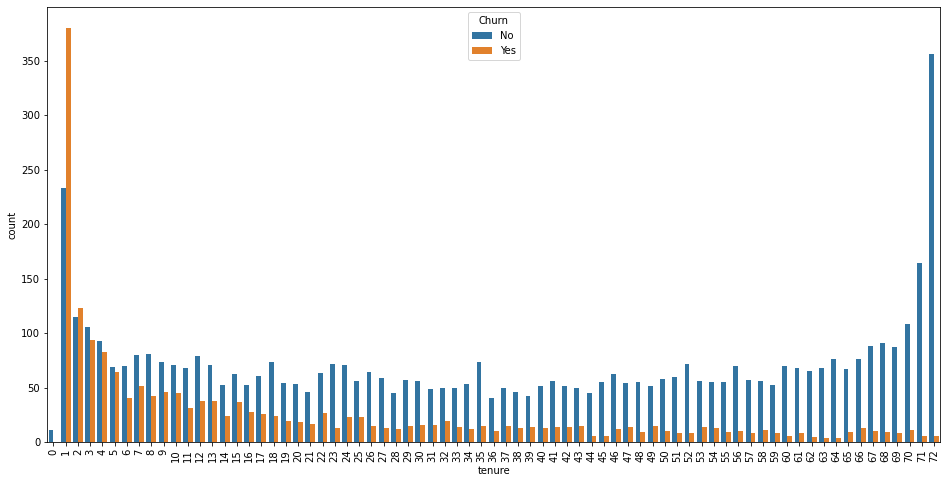

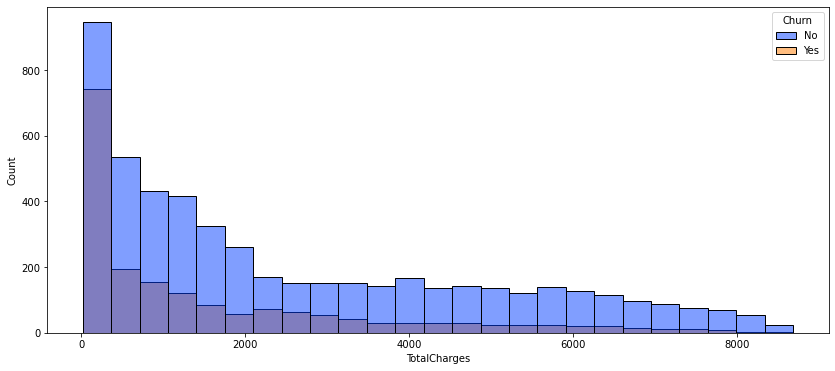

In [10]:
plt.figure(figsize= (16, 8))
sns.countplot(data = d4TelcoChurn, x = 'tenure', hue = 'Churn')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (14,6))
sns.set_palette('bright')
sns.histplot(data = d4TelcoChurn, x = 'TotalCharges', hue='Churn')
plt.show()

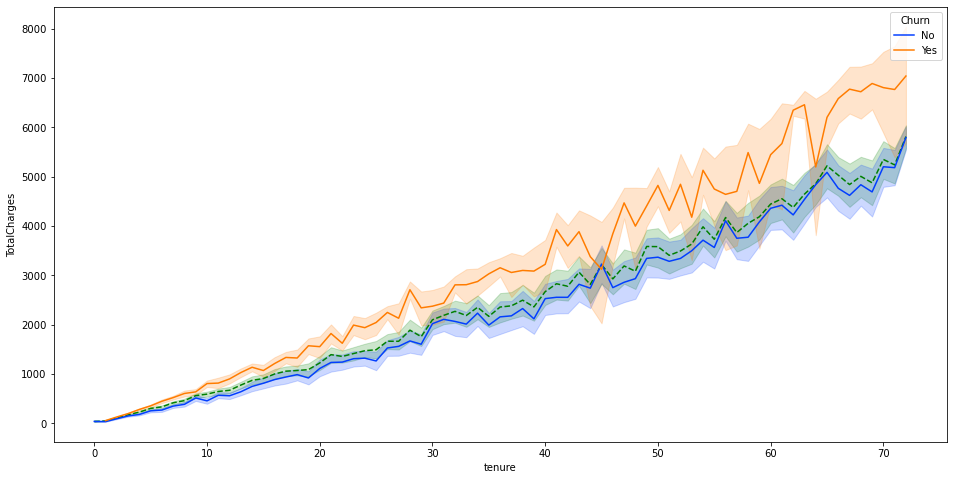

In [11]:
plt.figure(figsize = (16,8))
sns.lineplot(data= d4TelcoChurn, x = 'tenure', y = 'TotalCharges', color = 'green', linestyle = '--')
sns.lineplot(data = d4TelcoChurn, x = 'tenure', y = 'TotalCharges', hue = 'Churn')
plt.show()

In [12]:
a = d4TelcoChurn['Churn'].value_counts()
print(a)
a_No = a['No']/(a['No']+a['Yes'])
a_Yes = a['Yes']/(a['No']+a['Yes'])
print(f'Average Non Attrition for complete dataset is {a_No*100:.2f}%.')
print(f'Average Attrition for complete dataset is {a_Yes*100:.2f}%.')


# Attrition in 69 + Tenure and Total charges above 4400
d4TelcoChurnTen69_and_up = d4TelcoChurn[d4TelcoChurn['tenure'] >= 69]
b = d4TelcoChurnTen69_and_up['Churn'].value_counts()
b_No = b['No']/(b['No']+b['Yes'])
b_Yes = b['Yes']/(b['No']+b['Yes'])
print(f'Average Non Attrition for Tenure 69 and up data is {b_No*100:.2f}%.')
print(f'Average Attrition for Tenure 69 and up data is {b_Yes*100:.2f}%.')
d4TelcoChurn_hi_charges = d4TelcoChurn[d4TelcoChurn['TotalCharges'] > 4400]
c = d4TelcoChurn_hi_charges['Churn'].value_counts()
c_No = c['No']/(c['No']+c['Yes'])
c_Yes = c['Yes']/(c['No']+b['Yes'])
print(f'Average Non Attrition for High Charges data is {c_No*100:.2f}%.')
print(f'Average Attrition for High Charges data is {c_Yes*100:.2f}%.')
d4TelcoChurn_hicharge_and_tenure = d4TelcoChurn[(d4TelcoChurn['TotalCharges'] > 4400) & (d4TelcoChurn['tenure'] >= 69)]
d = d4TelcoChurn_hicharge_and_tenure['Churn'].value_counts()
d_No = d['No']/(d['No']+d['Yes'])
d_Yes = d['Yes']/(d['No']+d['Yes'])
print(f'Average Non Attrition for High Charges & Tenure data is {d_No*100:.2f}%.')
print(f'Average Attrition for High Charges & Tenure data is {d_Yes*100:.2f}%.')



No     5174
Yes    1869
Name: Churn, dtype: int64
Average Non Attrition for complete dataset is 73.46%.
Average Attrition for complete dataset is 26.54%.
Average Non Attrition for Tenure 69 and up data is 95.84%.
Average Attrition for Tenure 69 and up data is 4.16%.
Average Non Attrition for High Charges data is 85.81%.
Average Attrition for High Charges data is 16.13%.
Average Non Attrition for High Charges & Tenure data is 94.82%.
Average Attrition for High Charges & Tenure data is 5.18%.


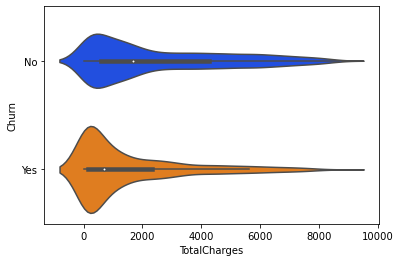

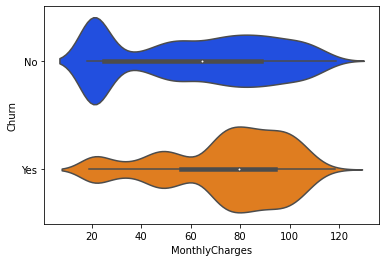

In [13]:
sns.violinplot(data=d4TelcoChurn, x='TotalCharges', y='Churn')
plt.show()

sns.violinplot(data=d4TelcoChurn, x='MonthlyCharges', y='Churn')
plt.show()

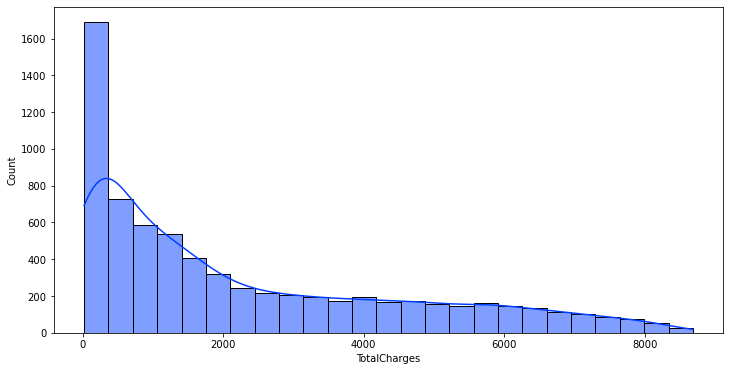

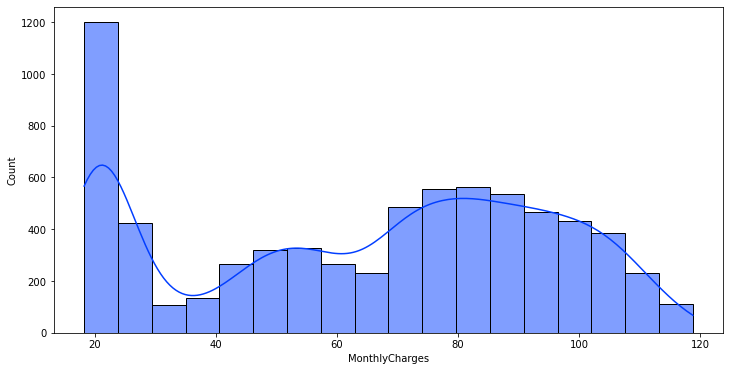

In [14]:
plt.figure(figsize = (12,6))
sns.histplot(data = d4TelcoChurn, x ='TotalCharges', kde=True)
plt.show()

plt.figure(figsize = (12,6))
sns.histplot(data = d4TelcoChurn, x ='MonthlyCharges', kde=True)
plt.show()

### Observation
- It seems like the attrition rate in longer tenured customers is much lower than average 
- However, an increase in total charges on longer tenured customer creates a dispropotionate increase in customer attrition in this group i.e. longer tenured customers do not tolerate increase in charges easily. Worth studying if these are profitable customers being lost.

In [15]:
# Correlation between variables
corrmat = round(d4TelcoChurn.corr(),2)
print(corrmat)

                SeniorCitizen  tenure  MonthlyCharges  TotalCharges
SeniorCitizen            1.00    0.02            0.22          0.10
tenure                   0.02    1.00            0.25          0.83
MonthlyCharges           0.22    0.25            1.00          0.65
TotalCharges             0.10    0.83            0.65          1.00


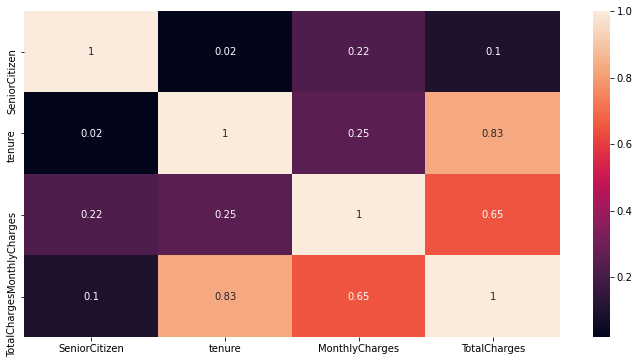

In [16]:
#Plot correlation between variables
plt.figure(figsize = (12,6))
sns.heatmap(corrmat, annot = True)
plt.show()

## Observation
1. Tenure and Total Charges are highly correlated
2. Tenure and monthly charges are not highly correlated.
3. Monthly charges and Total Charges are correlated but not very strongly so.
4. Need to ask business the components of Total Charges to understand why the correlation between Monthly Charges and Total charges is weaker than correlation between Tenure and Total Charges. Why would an increase in Tenure cause increase in total charges? Unless these actually have no causal relationship and it is only a co-incidental relationship.

In [17]:
# Check if SeniorCitizen is an indicator feature.
d4TelcoChurn.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

# Data PreProcessing

In [18]:
# Change Churn to Target with 1s and 0s instead of Yes and No
d4TelcoChurn['Target'] = np.where(d4TelcoChurn['Churn'] == 'Yes', 1, 0)
d4TelcoChurn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  Target  
0              29.85         29.85    No       0  
1              56.95       1889.50    No       0  
2              53.85        108.15   Yes       1  
3              42.30       1840.75    No       0  
4              70.70        151.65   Yes       1  
...              ...           ...   ...     ...  
7038           84.80       1990.50    No       0  
7039          103.20       7362.90    No       0  
7040           29.60        346.45    No       0  
7041           74.40        306.60   Yes       1  
7042     

In [19]:
# Seperate X and Y - Independant and Dependant variables

Y = d4TelcoChurn[['Target']]
print(type(Y))

X = d4TelcoChurn.drop(['customerID', 'Churn', 'Target'], axis=1)
Target_mean = Y['Target'].mean()
print(f'Churn rate is {Target_mean*100:.2f}%.')


<class 'pandas.core.frame.DataFrame'>
Churn rate is 26.54%.


In [20]:
X_num = X.select_dtypes(include = 'number')
X_char = X.select_dtypes(include = 'object')
print(X_num.head())
print(X_char.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15
3              0      45           42.30       1840.75
4              0       2           70.70        151.65
   gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female     Yes         No           No  No phone service             DSL   
1    Male      No         No          Yes                No             DSL   
2    Male      No         No          Yes                No             DSL   
3    Male      No         No           No  No phone service             DSL   
4  Female      No         No          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes 

In [21]:
X_ind = X_num[['SeniorCitizen']]
X_num = X_num.drop('SeniorCitizen', axis=1)
print(type(X_ind))
print(X_ind.head())
print(X_num.head())
print(X_char.head())

<class 'pandas.core.frame.DataFrame'>
   SeniorCitizen
0              0
1              0
2              0
3              0
4              0
   tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65
   gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female     Yes         No           No  No phone service             DSL   
1    Male      No         No          Yes                No             DSL   
2    Male      No         No          Yes                No             DSL   
3    Male      No         No           No  No phone service             DSL   
4  Female      No         No          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No 

### Outlier Analysis of Numerical Features

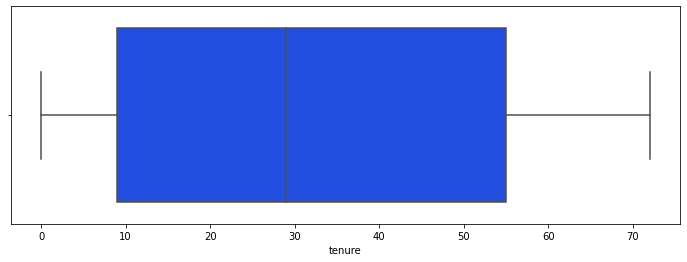

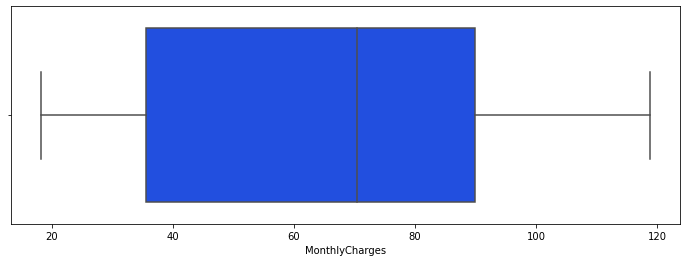

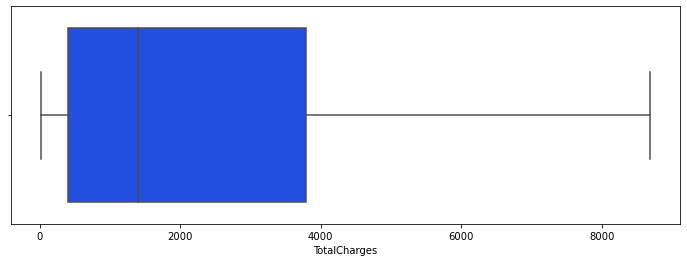

In [22]:
X_num_feat = X_num.columns
for x in X_num_feat:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=d4TelcoChurn, x = x, orient='h')


plt.show()

In [23]:
#Outlier detection using Interquartile range

outliers_Tot_charges = d4TelcoChurn.describe().loc[['25%','75%']]['TotalCharges']
IQR = outliers_Tot_charges.loc['75%'] - outliers_Tot_charges.loc['25%']

upper_limit = outliers_Tot_charges.loc['75%'] + (1.5*IQR)
lower_limit = outliers_Tot_charges.loc['25%'] - (1.5*IQR)
print(upper_limit, lower_limit)

X_num_total_charge_outlier = X_num[(X_num.TotalCharges > upper_limit) | (X_num.TotalCharges < lower_limit)]
print(X_num_total_charge_outlier)
X_num_afterOutlierRemoval = X_num[(X_num.TotalCharges < upper_limit) & (X_num.TotalCharges > lower_limit)]
print(X_num_afterOutlierRemoval.shape)

8868.675 -4683.525
Empty DataFrame
Columns: [tenure, MonthlyCharges, TotalCharges]
Index: []
(7043, 3)


### Observation
1. Plotting and numerically analyzing the Total Charges data does not reveal outliers.

In [24]:
# def outlier_cap(x):
#     x = x.clip(lower=x.quantile(0.01))
#     x = x.clip(upper=x.quantile(0.99))
#     return(x)

In [25]:
# X_num = X_num.apply(lambda x : outlier_cap(x))
# X_num.describe()

#### Decided not to cap the outliers since :
#### 1. Plotting and numerically analyzing the data does not seem to warrant it.
#### 2. There  was no significant improvement to models performances after capping.

## Feature selection of Numerical Features

### Remove features with 0 Variance

In [26]:
var_select = VarianceThreshold(threshold = 0)
var_select.fit_transform(X_num)
columns = var_select.get_support(indices=True)
X_num1 = X_num.iloc[:,columns]
print(X_num1.head())

   tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65


In [27]:
print(X_num1.iloc[0])

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64


### No 0 Variance columns in Numerical Features. Continue with X_num dataframe

### Bi-Variate analysis (Feature Discretization)

In [28]:
discrete_num = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_num_binned = pd.DataFrame(discrete_num.fit_transform(X_num1), index=X_num1.index, columns = X_num1.columns).add_suffix('_Rank')
X_num_binned.head()
X_num_binned.tail()

tenure_Rank  MonthlyCharges_Rank  TotalCharges_Rank
7038          4.0                  6.0                5.0
7039          9.0                  9.0                9.0
7040          2.0                  2.0                2.0
7041          1.0                  5.0                2.0
7042          8.0                  9.0                9.0

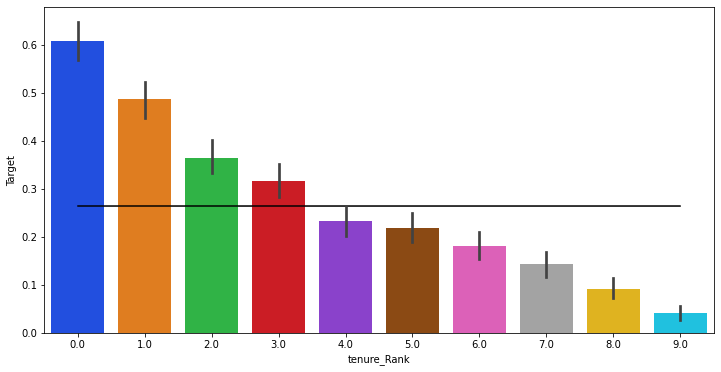

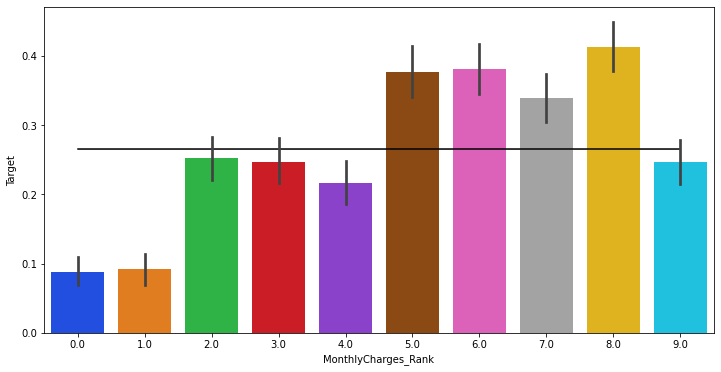

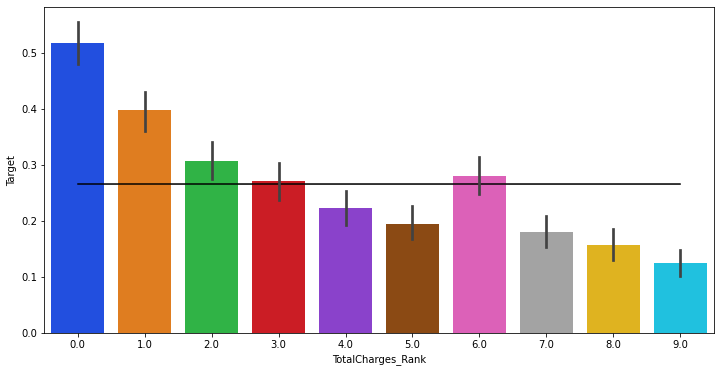

In [29]:
num_binned_wTarget = pd.concat([Y,X_num_binned], axis=1, join='inner')

for col in X_num_binned.columns:
    plt.figure(figsize= (12,6))
    sns.lineplot(data=num_binned_wTarget, x = col, y = num_binned_wTarget['Target'].mean(), color = 'black')
    sns.barplot(data = num_binned_wTarget, x = col, y='Target')

plt.show()

In [30]:
selected_features_num = X_num1
selected_features_num.shape

(7043, 3)

### Scale the numerical data

In [31]:
# robust_scale = preprocessing.RobustScaler()
# robust_scale_df = robust_scale.fit_transform(selected_features_num)
# selected_features_num = pd.DataFrame(robust_scale_df, columns = selected_features_num.columns)


#### No need to scale the numerical data since will be using classification models - Decision Tree, Random Forest, Gradient Boosting and Logistic Regression. Logistic regression will apply Sigmoid Function to the numerical data and the other models are based on entropy or Gini Gain. 

## Feature Selection - Categorical

In [32]:
X_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
dtypes: object(15)
memory usage: 825.5+ KB


### Bi-Variate analysis Categorical

#### (Indicated by Bar Plot) - 

Check the mean of the target for each subcategory in each column for e.g. in gender - was there any difference in the mean of the target column between females and males. 

Note - 1. The mean of the total churn in dataset is 26.13%. So, only subcategories showing significant deviation from the average total churn will be helpful in generating a model. 
#### (Indicated by Pie Plot) - 
Check the breakup of the total number of the users in that column by subcategory. 

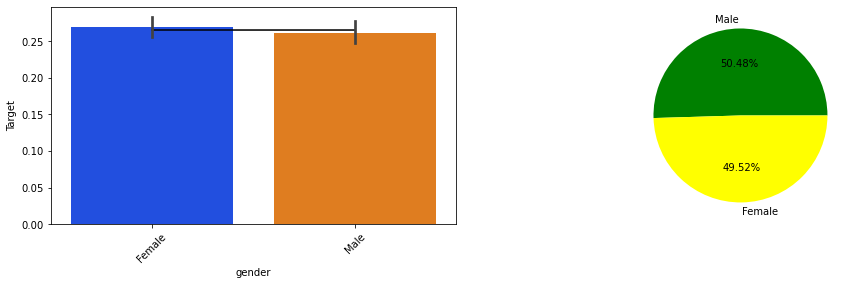

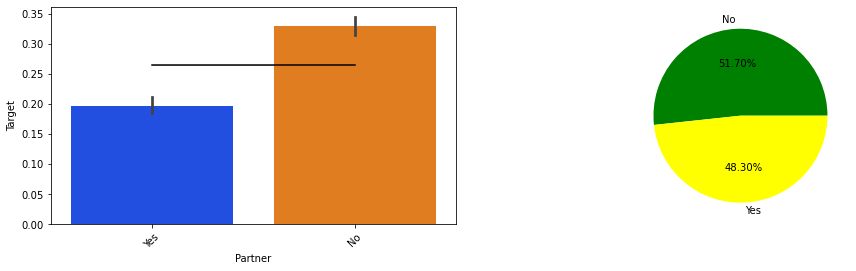

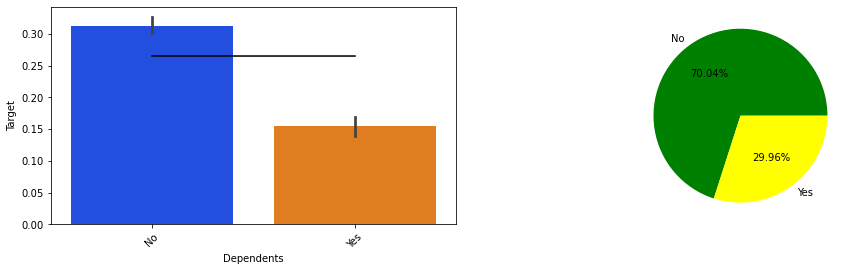

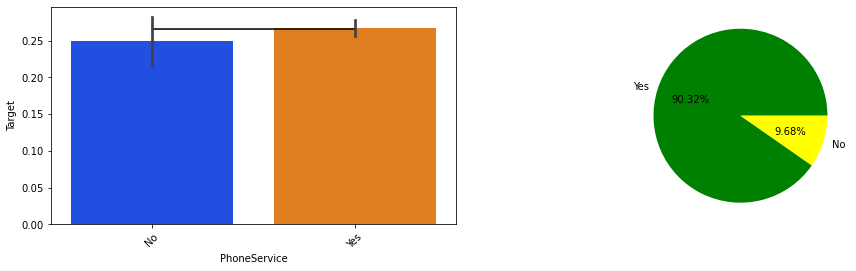

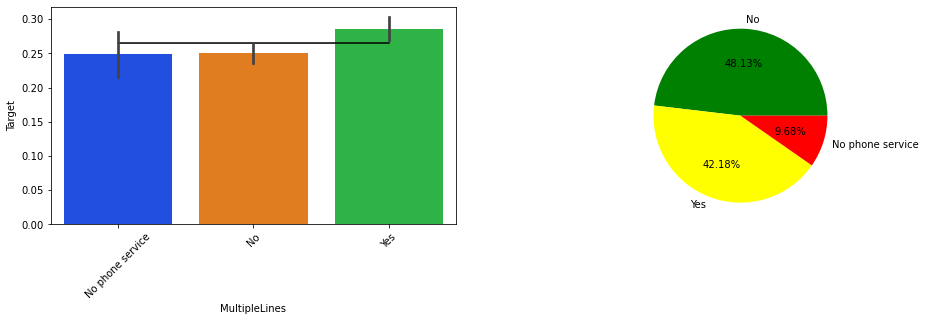

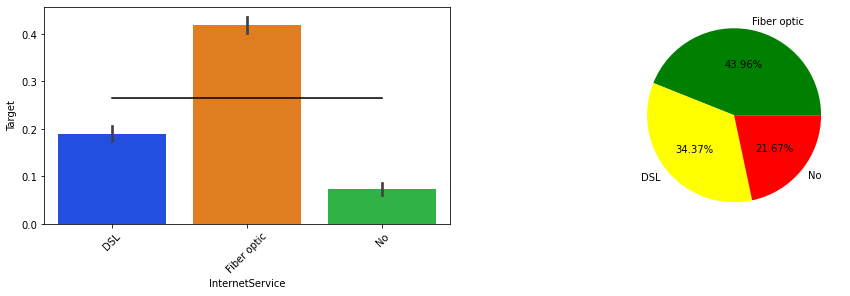

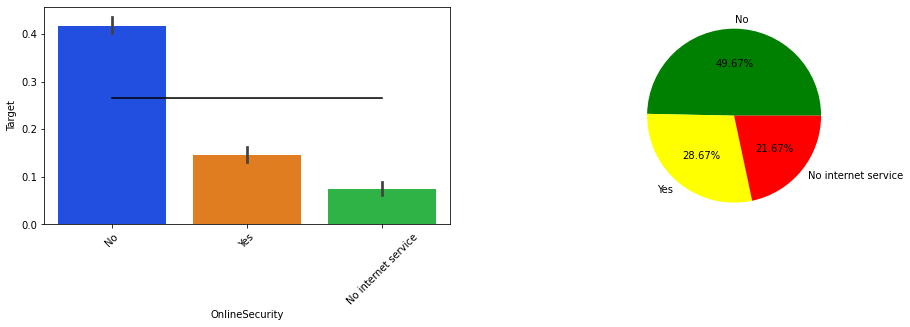

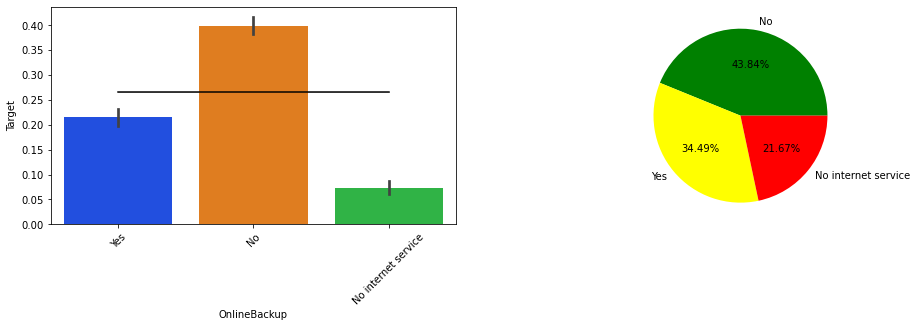

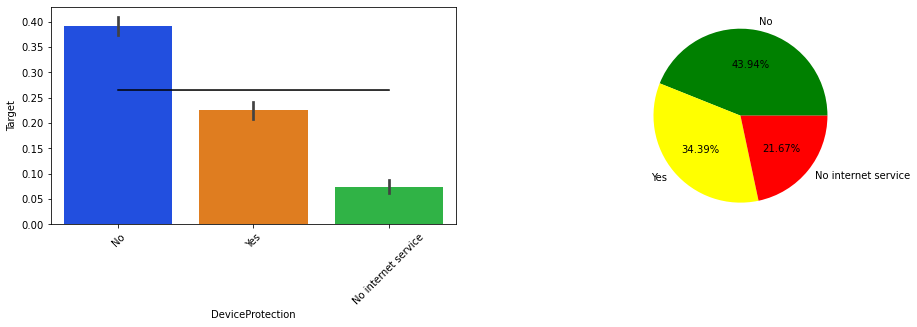

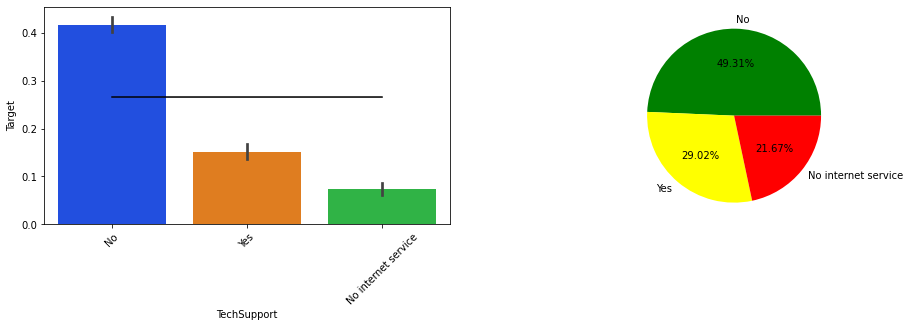

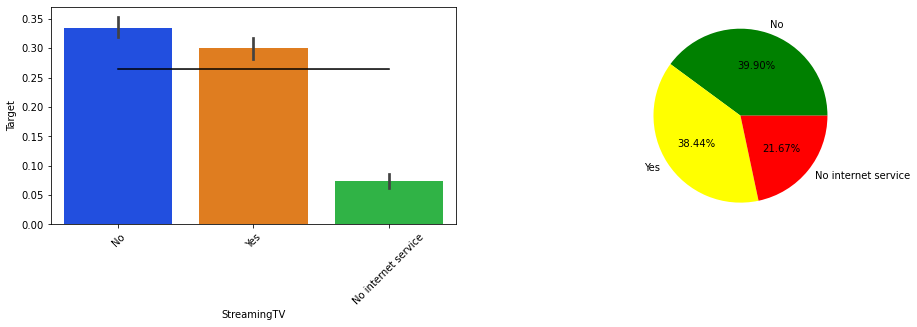

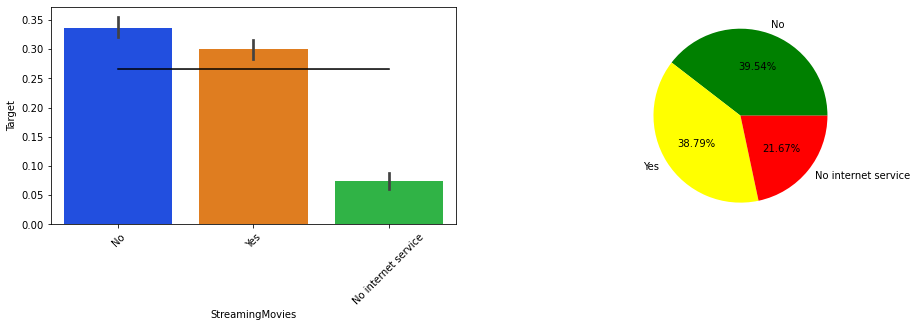

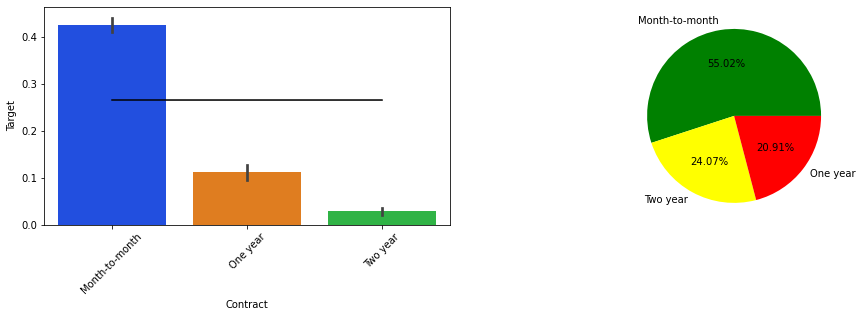

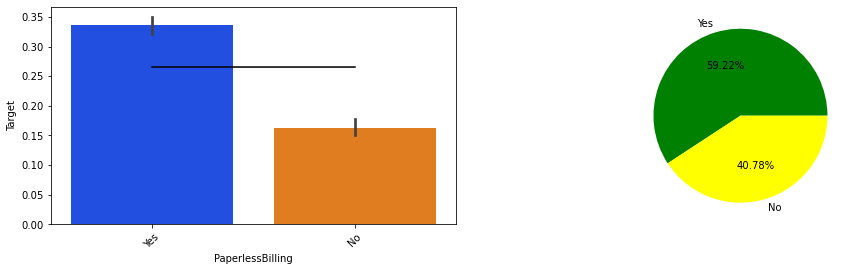

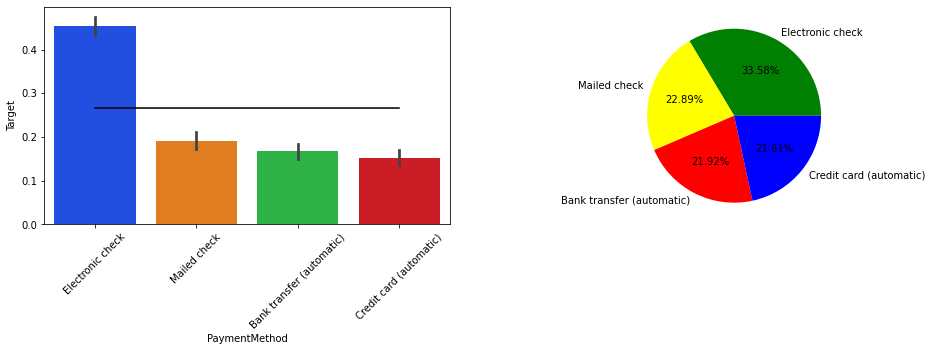

In [33]:

char_binned_wTarget = pd.concat([Y,X_char], axis=1, join='inner')

for col in X_char.columns:
    temp_x = X_char[col].value_counts().reset_index()
    plt.figure(figsize = (16,4))
    plt.subplot(1,2,1)
    sns.lineplot(data=char_binned_wTarget, x = col, y = char_binned_wTarget['Target'].mean(), color = 'black')
    sns.barplot(data=char_binned_wTarget, x= col, y = 'Target', estimator = np.mean)
    plt.xticks(rotation = 45)
    plt.subplot(1,2,2)
    temp_x = X_char[col].value_counts().reset_index()
    
    plt.pie(x = temp_x[col], data = temp_x, labels = temp_x['index'], autopct = '%.2f%%', colors=['green', 'yellow', 'red','blue'])
    
plt.show()

In [34]:
X_char = X_char.drop(['gender', 'PhoneService', 'MultipleLines'], axis=1)

X_char.shape

(7043, 12)

In [35]:
# for char1 in X_char.columns:
#     if X_char[char1].nunique() == 2:
#         X_char = pd.get_dummies(X_char, columns = [char1], drop_first = True)
#     elif X_char[char1].nunique() > 2:
#         X_char = pd.get_dummies(X_char, columns = [char1], drop_first = False)
        
for char1 in X_char.columns:
    X_char = pd.get_dummies(X_char, columns = [char1], drop_first = True)
        
print(X_char)
print(X_char.shape)

      Partner_Yes  Dependents_Yes  InternetService_Fiber optic  \
0               1               0                            0   
1               0               0                            0   
2               0               0                            0   
3               0               0                            0   
4               0               0                            1   
...           ...             ...                          ...   
7038            1               1                            0   
7039            1               1                            1   
7040            1               1                            0   
7041            1               0                            1   
7042            0               0                            1   

      InternetService_No  OnlineSecurity_No internet service  \
0                      0                                   0   
1                      0                                   0   
2              

### Select KBest for categorical features

In [36]:
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char,Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char.iloc[:,cols]

In [37]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

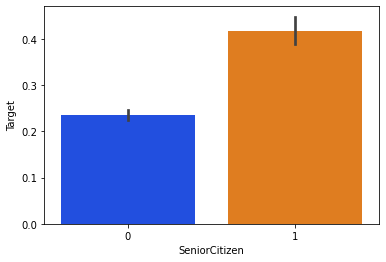

In [38]:
X_ind_merged=pd.concat([Y,X_ind],axis=1,join='inner')
for col in (X_ind.columns):
    plt.figure()
    sns.barplot(x=col, y="Target",data=X_ind_merged, estimator=np.mean )
plt.show()

In [39]:
#Selected indicator features

selected_features_ind = X_ind

### Create master for Independent Columns

In [40]:
X_Final = pd.concat([selected_features_ind, select_features_df_char, selected_features_num], axis = 1)

print(Y['Target'].value_counts())

0    5174
1    1869
Name: Target, dtype: int64


### Train Test Split

In [41]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Final, Y, test_size=0.3, random_state = 99)
print(f'X_Train shape is : {X_Train.shape}.')
print(f'X_Test shape is : {X_Test.shape}.')
print(f'Y_Train shape is : {Y_Train.shape}.')
print(f'Y_Test shape is : {Y_Test.shape}.')
Y_Train_Target = Y_Train['Target'].mean()
Y_Test_Target = Y_Test['Target'].mean()
print(f'Y_Train response rate : {Y_Train_Target}.')
print(f'Y_Test response rate : {Y_Test_Target}.')


X_Train shape is : (4930, 24).
X_Test shape is : (2113, 24).
Y_Train shape is : (4930, 1).
Y_Test shape is : (2113, 1).
Y_Train response rate : 0.2653144016227181.
Y_Test response rate : 0.26549929010885.


### Building the Logistic Regression Model

In [42]:
lr_model = LogisticRegression(random_state = 99, max_iter = 300)
lr_model.fit(X_Train, Y_Train)


C:\Users\Vikas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=300, random_state=99)

In [43]:
coeff_lrm = pd.DataFrame(X_Final.columns)
coeff_lrm.columns = ['Features']
coeff_lrm['Coefficient Estimates'] = lr_model.coef_[0]
print(coeff_lrm)
print('Feature with the least weight/coefficient estimate is : ')
print(coeff_lrm[coeff_lrm['Coefficient Estimates'] == abs(coeff_lrm['Coefficient Estimates']).min()])
print('Feature with the max weight/coefficient estimate is : ')
print(coeff_lrm[coeff_lrm['Coefficient Estimates'] == abs(coeff_lrm['Coefficient Estimates'].max())])

                                 Features  Coefficient Estimates
0                           SeniorCitizen               0.288407
1                             Partner_Yes               0.059622
2                          Dependents_Yes              -0.193457
3             InternetService_Fiber optic               0.592906
4                      InternetService_No              -0.167138
5      OnlineSecurity_No internet service              -0.167138
6                      OnlineSecurity_Yes              -0.582911
7        OnlineBackup_No internet service              -0.167138
8                        OnlineBackup_Yes              -0.264383
9    DeviceProtection_No internet service              -0.167138
10                   DeviceProtection_Yes              -0.026097
11        TechSupport_No internet service              -0.167138
12                        TechSupport_Yes              -0.499312
13        StreamingTV_No internet service              -0.167138
14    StreamingMovies_No 

In [44]:
Y_Pred_lrm = lr_model.predict(X_Test)
lrm_fit_model_accuracy = lr_model.score(X_Train, Y_Train)
lrm_fit_model_accuracy_test = lr_model.score(X_Test, Y_Test)
lrm_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_lrm)
lrm_recall = metrics.recall_score(Y_Test, Y_Pred_lrm)
lrm_precision = metrics.precision_score(Y_Test, Y_Pred_lrm)
lrm_f1 = metrics.f1_score(Y_Test, Y_Pred_lrm)

print('Model Accuracy is ', lrm_fit_model_accuracy)
print('Model Test data Accuracy is ', lrm_fit_model_accuracy_test)
print('Metrics Test Accuracy is : ', lrm_accuracy)
print('Recall is : ', lrm_recall)
print('Precision is : ', lrm_precision)
print('f1 Score is : ', lrm_f1)

Model Accuracy is  0.8056795131845842
Model Test data Accuracy is  0.7974443918599148
Metrics Test Accuracy is :  0.7974443918599148
Recall is :  0.5169340463458111
Precision is :  0.6487695749440716
f1 Score is :  0.5753968253968254


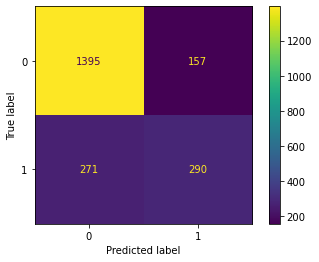

In [45]:
lrm_conf_mat = metrics.plot_confusion_matrix(lr_model, X_Test, Y_Test)

### Building the Decision Tree Model

In [46]:
dt_model_trial = DecisionTreeClassifier(random_state = 99)
dt_param = {'max_depth': [3,4,5,6,7,8,9,10], 'min_samples_split': [25,50,100,150,200,250], 'criterion' : ['gini', 'entropy']}
dt_model_grid = GridSearchCV(dt_model_trial, cv = 10, param_grid = dt_param, n_jobs = -1)
dt_model_grid.fit(X_Train, Y_Train)
print('Best parameters using grid search are \n', dt_model_grid.best_params_)


Best parameters using grid search are 
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 50}


In [47]:
dt_model_final = DecisionTreeClassifier(**dt_model_grid.best_params_)
dt_model_final.fit(X_Train, Y_Train)
Y_Pred_dt = dt_model_final.predict(X_Test)
dt_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_dt)
dt_precision = metrics.precision_score(Y_Test, Y_Pred_dt)
dt_recall = metrics.recall_score(Y_Test, Y_Pred_dt)
dt_f1 = metrics.f1_score(Y_Test, Y_Pred_dt)
print('Model Accuracy is : ', dt_model_final.score(X_Train, Y_Train))
print('Model Test Accuracy is : ', dt_model_final.score(X_Test, Y_Test))
print('Test Accuracy Score is : ', dt_accuracy)
print('Test Precision Score is :', dt_precision)
print('Test Recall score is : ', dt_recall)
print('Test f1 Score is : ', dt_f1)


Model Accuracy is :  0.8068965517241379
Model Test Accuracy is :  0.7889256980596309
Test Accuracy Score is :  0.7889256980596309
Test Precision Score is : 0.631578947368421
Test Recall score is :  0.4919786096256685
Test f1 Score is :  0.5531062124248498


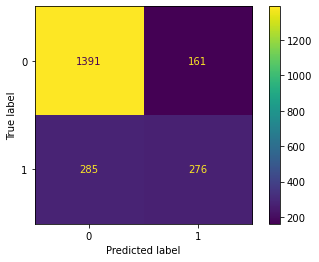

In [48]:
dt_conf_mat = metrics.plot_confusion_matrix(dt_model_final, X_Test, Y_Test)

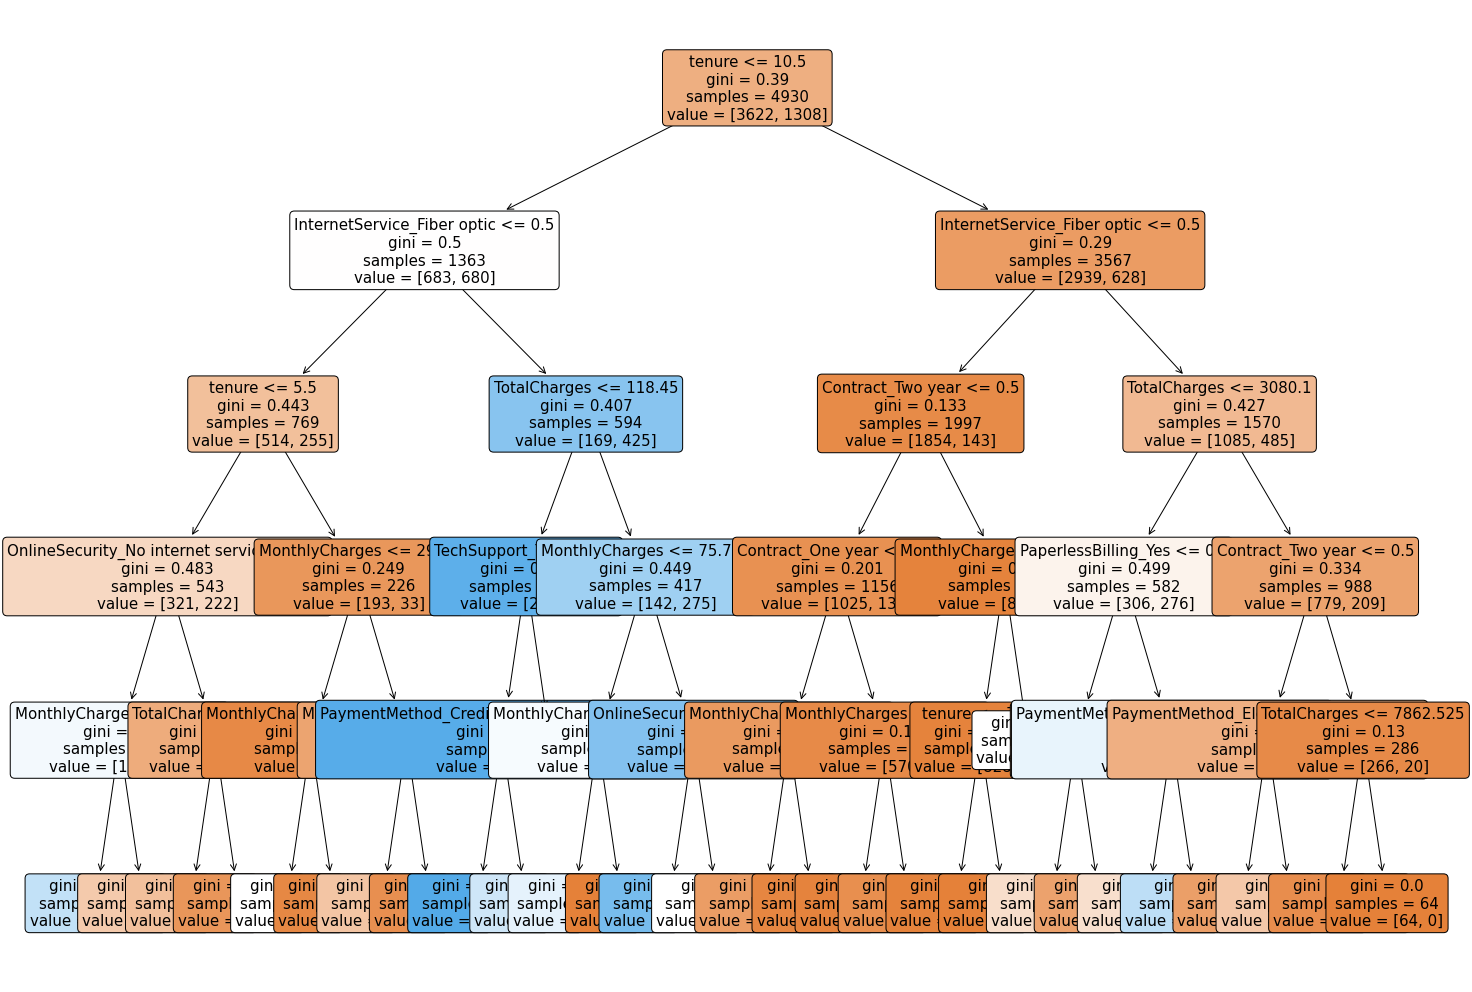

In [49]:
plt.figure(figsize= (24, 18))
tree.plot_tree(dt_model_final, filled = True, fontsize=15, rounded=True, feature_names = X_Final.columns)
plt.show()

### Building a Random Forest Model

In [50]:
rf_model = RandomForestClassifier(random_state = 99, criterion = 'gini', max_depth = 7, min_samples_split = 150)
rf_model.fit(X_Train, Y_Train)

<ipython-input-50-530d4ce4095c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_Train, Y_Train)


RandomForestClassifier(max_depth=7, min_samples_split=150, random_state=99)

In [51]:
rf_feature_importances = pd.DataFrame(rf_model.feature_importances_, index = X_Train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(rf_feature_importances)

                                       Importance
tenure                                   0.208651
TotalCharges                             0.122306
PaymentMethod_Electronic check           0.119652
InternetService_Fiber optic              0.115178
Contract_Two year                        0.101388
MonthlyCharges                           0.056235
OnlineSecurity_Yes                       0.033823
Contract_One year                        0.032690
TechSupport_Yes                          0.025470
TechSupport_No internet service          0.021210
OnlineSecurity_No internet service       0.019444
StreamingTV_No internet service          0.018662
InternetService_No                       0.017091
PaperlessBilling_Yes                     0.016183
StreamingMovies_No internet service      0.015889
DeviceProtection_No internet service     0.015662
OnlineBackup_Yes                         0.012979
OnlineBackup_No internet service         0.010936
SeniorCitizen                            0.008768


In [52]:
Y_Pred_rf = rf_model.predict(X_Test)
rf_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_rf)
rf_precision = metrics.precision_score(Y_Test, Y_Pred_rf)
rf_recall = metrics.recall_score(Y_Test, Y_Pred_rf)
rf_f1 = metrics.f1_score(Y_Test, Y_Pred_rf)

print('Model Accuracy is : ', rf_model.score(X_Train, Y_Train))
print('Model Test data Accuracy is : ', rf_model.score(X_Test, Y_Test))
print('Test Accuracy is : ', rf_accuracy)
print('Test Precision is : ', rf_precision)
print('Test Recall is : ', rf_recall)
print("Test f1 Score is : ", rf_f1)

Model Accuracy is :  0.8058823529411765
Model Test data Accuracy is :  0.795551348793185
Test Accuracy is :  0.795551348793185
Test Precision is :  0.6692913385826772
Test Recall is :  0.45454545454545453
Test f1 Score is :  0.5414012738853503


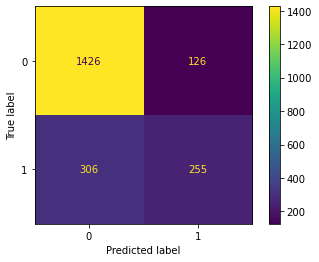

In [53]:
rf_conf_mat = metrics.plot_confusion_matrix(rf_model, X_Test, Y_Test)

### Building the Gradient Boosting Classifier Model

In [54]:
gbm_model = GradientBoostingClassifier(criterion='mse', random_state = 99, max_depth = 7, min_samples_split = 150)
gbm_model.fit(X_Train, Y_Train)

C:\Users\Vikas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(criterion='mse', max_depth=7, min_samples_split=150,
                           random_state=99)

In [55]:
gbm_feature_importances = pd.DataFrame(np.round(gbm_model.feature_importances_,4), index = X_Train.columns, columns=['Importance']).sort_values('Importance', ascending = False)
print(gbm_feature_importances)

                                       Importance
tenure                                     0.2597
TotalCharges                               0.1862
InternetService_Fiber optic                0.1811
MonthlyCharges                             0.1706
PaymentMethod_Electronic check             0.0437
Contract_Two year                          0.0370
Contract_One year                          0.0251
PaperlessBilling_Yes                       0.0230
OnlineSecurity_Yes                         0.0144
TechSupport_Yes                            0.0108
SeniorCitizen                              0.0086
OnlineBackup_Yes                           0.0084
Dependents_Yes                             0.0067
TechSupport_No internet service            0.0064
StreamingTV_No internet service            0.0027
PaymentMethod_Credit card (automatic)      0.0027
OnlineSecurity_No internet service         0.0026
DeviceProtection_No internet service       0.0025
DeviceProtection_Yes                       0.0021


In [56]:
Y_Pred_gbm = gbm_model.predict(X_Test)
gbm_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_gbm)
gbm_precision = metrics.precision_score(Y_Test, Y_Pred_gbm)
gbm_recall = metrics.recall_score(Y_Test, Y_Pred_gbm)
gbm_f1 = metrics.f1_score(Y_Test, Y_Pred_gbm)


print('Model Accuracy is : ', gbm_model.score(X_Train, Y_Train))
print('Model Test Accuracy is : ', gbm_model.score(X_Test, Y_Test))
print('Test Accuracy is : ', gbm_accuracy)
print('Test Recall is : ', gbm_recall)
print('Test Precision is : ', gbm_precision)
print('Test f1 Score is : ', gbm_f1)


Model Accuracy is :  0.8730223123732251
Model Test Accuracy is :  0.7903454803596782
Test Accuracy is :  0.7903454803596782
Test Recall is :  0.5062388591800356
Test Precision is :  0.6311111111111111
Test f1 Score is :  0.5618199802176063


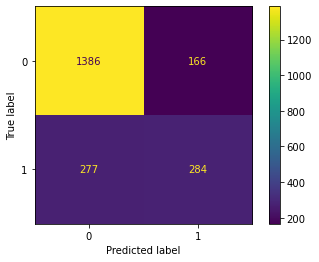

In [57]:
gbm_conf_mat = metrics.plot_confusion_matrix(gbm_model, X_Test, Y_Test)

In [58]:
stack_base_learner = [('rf_model', RandomForestClassifier(criterion='gini', random_state=99, max_depth=7, min_samples_split = 150)),('gbm_model', GradientBoostingClassifier(criterion = 'mse', random_state=0, max_depth=7, min_samples_split = 150))]
sc_model = StackingClassifier(estimators=stack_base_learner, final_estimator = LogisticRegression())
sc_model.fit(X_Train, Y_Train)

C:\Users\Vikas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(max_depth=7,
                                                       min_samples_split=150,
                                                       random_state=99)),
                               ('gbm_model',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=7,
                                                           min_samples_split=150,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [59]:
Y_Pred_sc = sc_model.predict(X_Test)
sc_accuracy = metrics.accuracy_score(Y_Test, Y_Pred_sc)
sc_recall = metrics.recall_score(Y_Test, Y_Pred_sc)
sc_precision = metrics.precision_score(Y_Test, Y_Pred_sc)
sc_f1 = metrics.f1_score(Y_Test, Y_Pred_sc)



print('Model Accuracy is : ', sc_model.score(X_Train, Y_Train))
print('Model Test Accuracy is : ', sc_model.score(X_Test, Y_Test))
print('Test Accuracy is : ', sc_accuracy)
print('Test Recall is : ', sc_recall)
print('Test Precision is : ', sc_precision)
print('Test f1 Score is : ', sc_f1)

Model Accuracy is :  0.8298174442190669
Model Test Accuracy is :  0.7974443918599148
Test Accuracy is :  0.7974443918599148
Test Recall is :  0.4919786096256685
Test Precision is :  0.6587112171837709
Test f1 Score is :  0.563265306122449


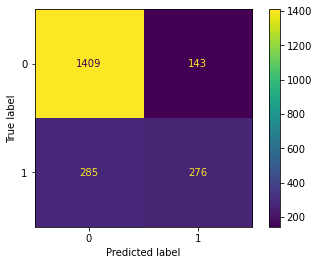

In [60]:
sc_conf_mat = metrics.plot_confusion_matrix(sc_model, X_Test, Y_Test)

## Model(s) Evaluation

In [61]:
print('Test Accuracy of the five models is : ', f'Logistic Regression : {lrm_accuracy}.', f'Decision Tree : {dt_accuracy}.', f'Random Forest : {rf_accuracy}.', f'Gradient Boosting : {gbm_accuracy}.', f'Stacking Classifier : {sc_accuracy}.', sep='\n')

Test Accuracy of the five models is : 
Logistic Regression : 0.7974443918599148.
Decision Tree : 0.7889256980596309.
Random Forest : 0.795551348793185.
Gradient Boosting : 0.7903454803596782.
Stacking Classifier : 0.7974443918599148.


In [62]:
print('Test Precision of the five models is : ', f'Logistic Regression : {lrm_precision}.', f'Decision Tree : {dt_precision}.', f'Random Forest : {rf_precision}.', f'Gradient Boosting : {gbm_precision}.', f'Stacking Classifier : {sc_precision}.', sep='\n')

Test Precision of the five models is : 
Logistic Regression : 0.6487695749440716.
Decision Tree : 0.631578947368421.
Random Forest : 0.6692913385826772.
Gradient Boosting : 0.6311111111111111.
Stacking Classifier : 0.6587112171837709.


In [63]:
print('Test Recall of the five models is : ', f'Logistic Regression : {lrm_recall}.', f'Decision Tree : {dt_recall}.', f'Random Forest : {rf_recall}.', f'Gradient Boosting : {gbm_recall}.', f'Stacking Classifier : {sc_recall}.', sep='\n')

Test Recall of the five models is : 
Logistic Regression : 0.5169340463458111.
Decision Tree : 0.4919786096256685.
Random Forest : 0.45454545454545453.
Gradient Boosting : 0.5062388591800356.
Stacking Classifier : 0.4919786096256685.


In [64]:
print('Test f1 Score of the five models is : ', f'Logistic Regression : {lrm_f1}.', f'Decision Tree : {dt_f1}.', f'Random Forest : {rf_f1}.', f'Gradient Boosting : {gbm_f1}.', f'Stacking Classifier : {sc_f1}.', sep='\n')

Test f1 Score of the five models is : 
Logistic Regression : 0.5753968253968254.
Decision Tree : 0.5531062124248498.
Random Forest : 0.5414012738853503.
Gradient Boosting : 0.5618199802176063.
Stacking Classifier : 0.563265306122449.


Logistic Regression Confusion Matrix


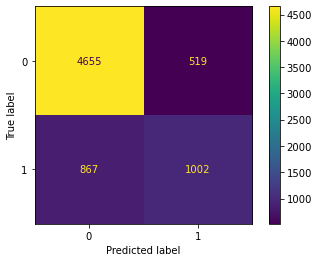

In [65]:
print('Logistic Regression Confusion Matrix')
metrics.plot_confusion_matrix(lr_model, X_Final, Y)

Decision Tree Confusion Matrix


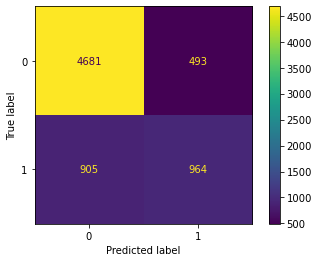

In [66]:
print('Decision Tree Confusion Matrix')
metrics.plot_confusion_matrix(dt_model_final, X_Final, Y)

Random Forest Confusion Matrix


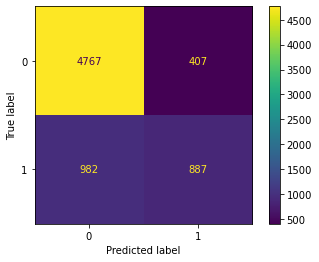

In [67]:
print('Random Forest Confusion Matrix')
metrics.plot_confusion_matrix(rf_model, X_Final, Y)

Gradient Boosting Confusion Matrix


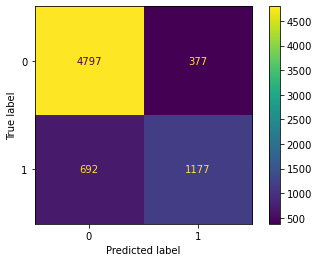

In [68]:
print('Gradient Boosting Confusion Matrix')
metrics.plot_confusion_matrix(gbm_model, X_Final, Y)

Stacking Classifier Confusion Matrix


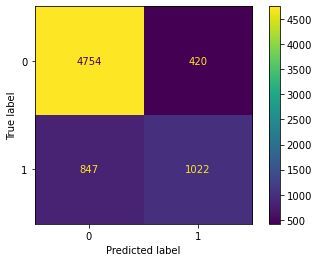

In [69]:
print('Stacking Classifier Confusion Matrix')
metrics.plot_confusion_matrix(sc_model, X_Final, Y)

#### Building the Probability Deciles

##### Logistic Regression Model Probability Deciles

In [70]:
y_pred_prob_lrm = lr_model.predict_proba(X_Final)[:,1]
d4TelcoChurn['Pred Prob LogReg'] = pd.DataFrame(y_pred_prob_lrm)
d4TelcoChurn['P_Rank_LogReg'] = pd.qcut(d4TelcoChurn['Pred Prob LogReg'].rank(method='first').values,10, duplicates='drop').codes+1
rank_lrm_actuals = d4TelcoChurn.groupby('P_Rank_LogReg')['Target'].agg(['count', 'mean'])
rank_lrm_predicted = d4TelcoChurn.groupby('P_Rank_LogReg')['Pred Prob LogReg'].agg(['mean'])

rank_lrm_actuals = pd.DataFrame(rank_lrm_actuals)
rank_lrm_predicted = pd.DataFrame(rank_lrm_predicted)

rank_lrm_actuals.rename(columns = {'mean': 'Actual Event Rate', 'count': 'Count'}, inplace=True)
rank_lrm_predicted.rename(columns = {'mean' : 'Pred Event Rate'}, inplace = True)

rank_lrm = pd.concat([rank_lrm_actuals, rank_lrm_predicted], axis = 1, join='inner')


sorted_rank_lrm = rank_lrm.sort_values(by='P_Rank_LogReg', ascending=False)
sorted_rank_lrm['No of Events'] = rank_lrm['Count']*rank_lrm['Actual Event Rate']
sorted_rank_lrm['Cum_Events'] = sorted_rank_lrm['No of Events'].cumsum()
sorted_rank_lrm['Event Captured'] = sorted_rank_lrm['No of Events']/sum(sorted_rank_lrm['No of Events'])
sorted_rank_lrm['Cum Event Cap'] = sorted_rank_lrm['Event Captured'].cumsum()

sorted_rank_lrm['Non Events'] = sorted_rank_lrm['Count'] - sorted_rank_lrm['No of Events']
sorted_rank_lrm['Cum Non Events'] = sorted_rank_lrm['Non Events'].cumsum()
sorted_rank_lrm['Non Event Captured'] = sorted_rank_lrm['Non Events']/sum(sorted_rank_lrm['Non Events'])
sorted_rank_lrm['Cum Non Event Cap'] = sorted_rank_lrm['Non Event Captured'].cumsum()

sorted_rank_lrm['Diff in Capture Cum'] = round(sorted_rank_lrm['Cum Event Cap'] - sorted_rank_lrm['Cum Non Event Cap'], 4)
sorted_rank_lrm['Random Cap'] = sorted_rank_lrm['Count']/sorted_rank_lrm['Count'].sum()
lrm_prob_dec = sorted_rank_lrm.reset_index()
lrm_prob_dec['Decile'] = lrm_prob_dec.index+1


lrm_prob_dec


P_Rank_LogReg  Count  Actual Event Rate  Pred Event Rate  No of Events  \
0             10    705           0.753191         0.725031         531.0   
1              9    704           0.589489         0.585054         415.0   
2              8    704           0.438920         0.454875         309.0   
3              7    704           0.312500         0.328302         220.0   
4              6    704           0.235795         0.223801         166.0   
5              5    705           0.143262         0.154690         101.0   
6              4    704           0.078125         0.094988          55.0   
7              3    704           0.062500         0.052125          44.0   
8              2    704           0.024148         0.022623          17.0   
9              1    705           0.015603         0.006415          11.0   

   Cum_Events  Event Captured  Cum Event Cap  Non Events  Cum Non Events  \
0       531.0        0.284109       0.284109       174.0           174.0   
1       946.0        0.222044       0.506153       289.0           463.0   
2      1255.0        0.165329       0.671482       395.0           858.0   
3      1475.0        0.117710       0.789192       484.0          1342.0   
4      1641.0        0.088818       0.878010       538.0          1880.0   
5      1742.0        0.054040       0.932049       604.0          2484.0   
6      1797.0        0.029428       0.961477       649.0          3133.0   
7      1841.0        0.023542       0.985019       660.0          3793.0   
8      1858.0        0.009096       0.994114       687.0          4480.0   
9      1869.0        0.005886       1.000000       694.0          5174.0   

   Non Event Captured  Cum Non Event Cap  Diff in Capture Cum  Random Cap  \
0            0.033630           0.033630               0.2505    0.100099   
1            0.055856           0.089486               0.4167    0.099957   
2            0.076343           0.165829               0.5057    0.099957   
3            0.093545           0.259374               0.5298    0.099957   
4            0.103981           0.363355               0.5147    0.099957   
5            0.116738           0.480093               0.4520    0.100099   
6            0.125435           0.605528               0.3559    0.099957   
7            0.127561           0.733089               0.2519    0.099957   
8            0.132779           0.865868               0.1282    0.099957   
9            0.134132           1.000000               0.0000    0.100099   

   Decile  
0       1  
1       2  
2       3  
3       4  
4       5  
5       6  
6       7  
7       8  
8       9  
9      10

#### Logistic Regression Model Lorenz Curve

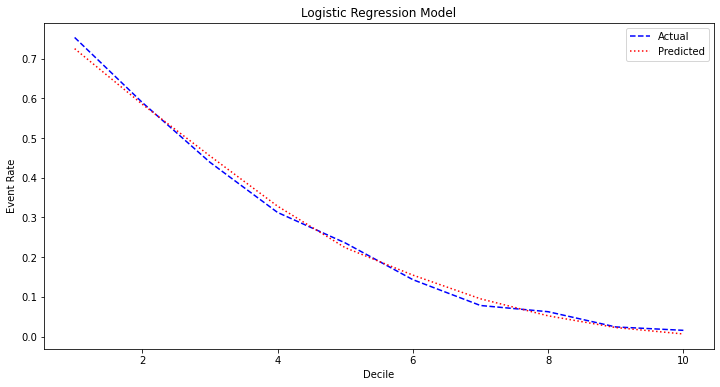

In [71]:
plt.figure(figsize = (12,6))
sns.lineplot(data = lrm_prob_dec, x = 'Decile', y = 'Actual Event Rate', color = 'blue', linestyle = 'dashed', label = 'Actual')
sns.lineplot(data = lrm_prob_dec, x = 'Decile', y = 'Pred Event Rate', color = 'red', linestyle = 'dotted', label = 'Predicted')
plt.legend()
plt.ylabel('Event Rate')
plt.title('Logistic Regression Model')
plt.show()

#### Decision Tree Model probability Deciles

In [72]:
y_pred_prob_dt = dt_model_final.predict_proba(X_Final)[:,1]
d4TelcoChurn['Pred Prob DT'] = pd.DataFrame(y_pred_prob_dt)
d4TelcoChurn['P_Rank_DT'] = pd.qcut(d4TelcoChurn['Pred Prob DT'].rank(method='first').values, 10, duplicates='drop').codes+1
rank_dt_actuals = d4TelcoChurn.groupby('P_Rank_DT')['Target'].agg(['count', 'mean'])
rank_dt_pred = d4TelcoChurn.groupby('P_Rank_DT')['Pred Prob DT'].agg(['mean'])

rank_dt_actuals = pd.DataFrame(rank_dt_actuals)
rank_dt_pred = pd.DataFrame(rank_dt_pred)

rank_dt_actuals.rename(columns = {'count': 'Count', 'mean' : 'Actual Event Rate'}, inplace = True)
rank_dt_pred.rename(columns = {'mean': 'Pred Event Rate'}, inplace = True)

rank_dt = pd.concat([rank_dt_actuals, rank_dt_pred], axis = 1, join = 'inner')

sorted_rank_dt = rank_dt.sort_values(by='P_Rank_DT', ascending = False)

sorted_rank_dt['No of Events'] = sorted_rank_dt['Count']*sorted_rank_dt['Actual Event Rate']
sorted_rank_dt['Cum Events'] = sorted_rank_dt['No of Events'].cumsum()
sorted_rank_dt['Event Captured'] = sorted_rank_dt['No of Events']/sum(sorted_rank_dt['No of Events'])
sorted_rank_dt['Cum Event Captured'] = sorted_rank_dt['Event Captured'].cumsum()

sorted_rank_dt['Non Events'] = sorted_rank_dt['Count']- sorted_rank_dt['No of Events']
sorted_rank_dt['Cum Non Events'] = sorted_rank_dt['Non Events'].cumsum()
sorted_rank_dt['Non Events Captured'] = sorted_rank_dt['Non Events']/ sum(sorted_rank_dt['Non Events'])
sorted_rank_dt['Cum Non Events Cap'] = sorted_rank_dt['Non Events Captured'].cumsum()

sorted_rank_dt['Diff in Cap Cum'] = round(sorted_rank_dt['Cum Event Captured'] - sorted_rank_dt['Cum Non Events Cap'],4)
sorted_rank_dt['Random Cap'] = sorted_rank_dt['Count']/sum(sorted_rank_dt['Count'])

dt_prob_dec = sorted_rank_dt.reset_index()
dt_prob_dec['Decile'] = dt_prob_dec.index+1

dt_prob_dec


P_Rank_DT  Count  Actual Event Rate  Pred Event Rate  No of Events  \
0         10    705           0.761702         0.772675         537.0   
1          9    704           0.565341         0.584296         398.0   
2          8    704           0.420455         0.418318         296.0   
3          7    704           0.325284         0.339716         229.0   
4          6    704           0.211648         0.192968         149.0   
5          5    705           0.178723         0.173185         126.0   
6          4    704           0.103693         0.097714          73.0   
7          3    704           0.056818         0.052011          40.0   
8          2    704           0.021307         0.017199          15.0   
9          1    705           0.008511         0.007571           6.0   

   Cum Events  Event Captured  Cum Event Captured  Non Events  Cum Non Events  \
0       537.0        0.287319            0.287319       168.0           168.0   
1       935.0        0.212948            0.500268       306.0           474.0   
2      1231.0        0.158373            0.658641       408.0           882.0   
3      1460.0        0.122525            0.781166       475.0          1357.0   
4      1609.0        0.079722            0.860888       555.0          1912.0   
5      1735.0        0.067416            0.928304       579.0          2491.0   
6      1808.0        0.039058            0.967362       631.0          3122.0   
7      1848.0        0.021402            0.988764       664.0          3786.0   
8      1863.0        0.008026            0.996790       689.0          4475.0   
9      1869.0        0.003210            1.000000       699.0          5174.0   

   Non Events Captured  Cum Non Events Cap  Diff in Cap Cum  Random Cap  \
0             0.032470            0.032470           0.2548    0.100099   
1             0.059142            0.091612           0.4087    0.099957   
2             0.078856            0.170468           0.4882    0.099957   
3             0.091805            0.262273           0.5189    0.099957   
4             0.107267            0.369540           0.4913    0.099957   
5             0.111906            0.481446           0.4469    0.100099   
6             0.121956            0.603402           0.3640    0.099957   
7             0.128334            0.731736           0.2570    0.099957   
8             0.133166            0.864901           0.1319    0.099957   
9             0.135099            1.000000           0.0000    0.100099   

   Decile  
0       1  
1       2  
2       3  
3       4  
4       5  
5       6  
6       7  
7       8  
8       9  
9      10

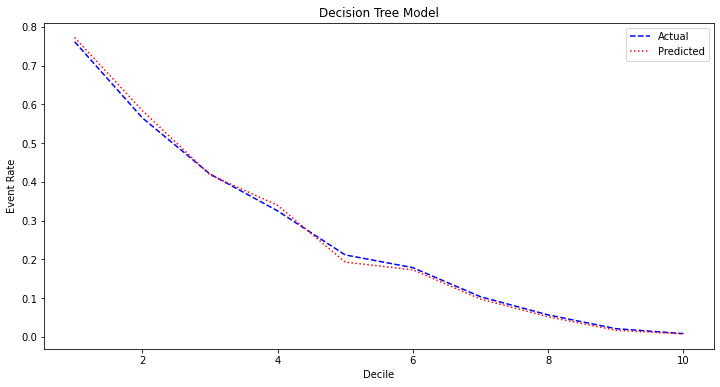

In [73]:
plt.figure(figsize = (12,6))
sns.lineplot(data = dt_prob_dec, y = 'Actual Event Rate', x = 'Decile', color = 'blue', linestyle = 'dashed', label = 'Actual')
sns.lineplot(data = dt_prob_dec, x = 'Decile', y = 'Pred Event Rate', color = 'red', linestyle = 'dotted', label = 'Predicted')
plt.ylabel('Event Rate')
plt.title('Decision Tree Model')
plt.legend()
plt.show()

#### Random Forest Model Probability Deciles

In [74]:
y_pred_prob_RF = rf_model.predict_proba(X_Final)[:,1]
d4TelcoChurn['Pred Prob RF'] = pd.DataFrame(y_pred_prob_RF)
d4TelcoChurn['P_Rank_RF'] = pd.qcut(d4TelcoChurn['Pred Prob RF'].rank(method='first').values, 10, duplicates='drop').codes+1

rank_rf_actuals = d4TelcoChurn.groupby('P_Rank_RF')['Target'].agg(['count', 'mean'])
rank_rf_pred = d4TelcoChurn.groupby('P_Rank_RF')['Pred Prob RF'].agg(['mean'])    

rank_rf_actuals.rename(columns = {'count': 'Count', 'mean' : 'Actual Event Rate'}, inplace=True)
rank_rf_pred.rename(columns = {'mean': 'Pred Event Rate'}, inplace = True)

rank_rf = pd.concat([rank_rf_actuals, rank_rf_pred], axis = 1, join='inner')

sorted_rank_rf = rank_rf.sort_values(by='P_Rank_RF', ascending = False)

sorted_rank_rf['No of Events'] = sorted_rank_rf['Count']*sorted_rank_rf['Actual Event Rate']
sorted_rank_rf['Cum Events'] = sorted_rank_rf['No of Events'].cumsum()
sorted_rank_rf['Events Captured'] = sorted_rank_rf['No of Events']/sum(sorted_rank_rf['No of Events'])
sorted_rank_rf['Cum Events Captured'] = sorted_rank_rf['Events Captured'].cumsum()

sorted_rank_rf['Non Events'] = sorted_rank_rf['Count'] - sorted_rank_rf['No of Events']
sorted_rank_rf['Cum Non Events'] = sorted_rank_rf['Non Events'].cumsum()
sorted_rank_rf['Non Events Captured'] = sorted_rank_rf['Non Events']/sum(sorted_rank_rf['Non Events'])
sorted_rank_rf['Cum Non Events Cap'] = sorted_rank_rf['Non Events Captured'].cumsum()

sorted_rank_rf['Diff in Cap Cum'] = sorted_rank_rf['Events Captured'] - sorted_rank_rf['Non Events Captured']
sorted_rank_rf['Random Cap'] = sorted_rank_rf['Count']/sum(sorted_rank_rf['Count'])

rf_prob_dec = sorted_rank_rf.reset_index()
rf_prob_dec['Decile'] = rf_prob_dec.index+1



rf_prob_dec






P_Rank_RF  Count  Actual Event Rate  Pred Event Rate  No of Events  \
0         10    705           0.768794         0.671919         542.0   
1          9    704           0.588068         0.536274         414.0   
2          8    704           0.450284         0.421616         317.0   
3          7    704           0.325284         0.318204         229.0   
4          6    704           0.223011         0.249209         157.0   
5          5    705           0.120567         0.185208          85.0   
6          4    704           0.105114         0.127937          74.0   
7          3    704           0.055398         0.079574          39.0   
8          2    704           0.014205         0.038441          10.0   
9          1    705           0.002837         0.019413           2.0   

   Cum Events  Events Captured  Cum Events Captured  Non Events  \
0       542.0         0.289995             0.289995       163.0   
1       956.0         0.221509             0.511503       290.0   
2      1273.0         0.169609             0.681113       387.0   
3      1502.0         0.122525             0.803638       475.0   
4      1659.0         0.084002             0.887640       547.0   
5      1744.0         0.045479             0.933119       620.0   
6      1818.0         0.039593             0.972713       630.0   
7      1857.0         0.020867             0.993579       665.0   
8      1867.0         0.005350             0.998930       694.0   
9      1869.0         0.001070             1.000000       703.0   

   Cum Non Events  Non Events Captured  Cum Non Events Cap  Diff in Cap Cum  \
0           163.0             0.031504            0.031504         0.258491   
1           453.0             0.056049            0.087553         0.165459   
2           840.0             0.074797            0.162350         0.094812   
3          1315.0             0.091805            0.254155         0.030720   
4          1862.0             0.105721            0.359876        -0.021719   
5          2482.0             0.119830            0.479706        -0.074351   
6          3112.0             0.121763            0.601469        -0.082169   
7          3777.0             0.128527            0.729996        -0.107660   
8          4471.0             0.134132            0.864128        -0.128782   
9          5174.0             0.135872            1.000000        -0.134802   

   Random Cap  Decile  
0    0.100099       1  
1    0.099957       2  
2    0.099957       3  
3    0.099957       4  
4    0.099957       5  
5    0.100099       6  
6    0.099957       7  
7    0.099957       8  
8    0.099957       9  
9    0.100099      10

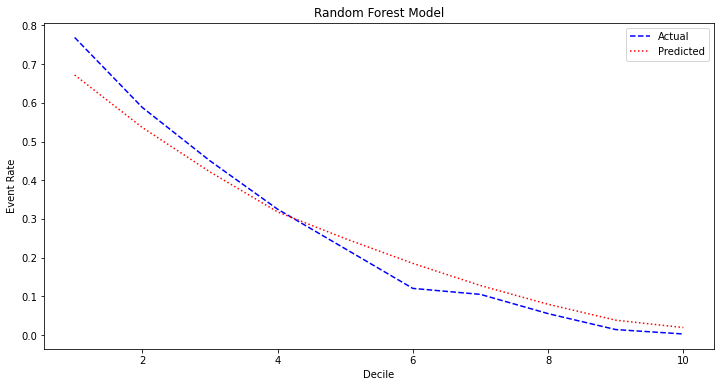

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(data=rf_prob_dec, x = 'Decile', y ='Actual Event Rate', color = 'blue', linestyle = 'dashed', label='Actual')
sns.lineplot(data=rf_prob_dec, x = 'Decile', y = 'Pred Event Rate', color = 'red', linestyle= 'dotted', label = 'Predicted')
plt.ylabel('Event Rate')
plt.title('Random Forest Model')
plt.legend()
plt.show()

#### Gradient Boosting Model Probability Deciles

In [76]:
y_pred_prob_gbm = gbm_model.predict_proba(X_Final)[:,1]
d4TelcoChurn['Pred Prob GBM'] = pd.DataFrame(y_pred_prob_gbm)
d4TelcoChurn['P_Rank_GBM'] = pd.qcut(d4TelcoChurn['Pred Prob GBM'].rank(method='first').values, 10, duplicates='drop').codes+1

rank_actuals_gbm = d4TelcoChurn.groupby('P_Rank_GBM')['Target'].agg(['count', 'mean'])
rank_pred_gbm = d4TelcoChurn.groupby('P_Rank_GBM')['Pred Prob GBM'].agg(['mean'])

rank_actuals_gbm.rename(columns = {'count': 'Count', 'mean': 'Actual Event Rate'},inplace = True)
rank_pred_gbm.rename(columns = {'mean': 'Pred Event Rate'}, inplace=True)

rank_gbm = pd.concat([rank_actuals_gbm, rank_pred_gbm], axis = 1, join = 'inner')

sorted_rank_gbm = rank_gbm.sort_values(by='P_Rank_GBM', ascending = False)

sorted_rank_gbm['No of Events'] = sorted_rank_gbm['Count']*sorted_rank_gbm['Actual Event Rate']
sorted_rank_gbm['Cum Events'] = sorted_rank_gbm['No of Events'].cumsum()
sorted_rank_gbm['Events Captured'] = sorted_rank_gbm['No of Events']/sum(sorted_rank_gbm['No of Events'])
sorted_rank_gbm['Cum Events Captured'] = sorted_rank_gbm['Events Captured'].cumsum()

sorted_rank_gbm['Non Events'] = sorted_rank_gbm['Count']-sorted_rank_gbm['No of Events']
sorted_rank_gbm['Cum Non Events'] = sorted_rank_gbm['Non Events'].cumsum()
sorted_rank_gbm['Non Event Captured'] = sorted_rank_gbm['Non Events']/sum(sorted_rank_gbm['Non Events'])
sorted_rank_gbm['Cum Non Event Captured'] = sorted_rank_gbm['Non Event Captured'].cumsum()

sorted_rank_gbm['Diff in Cap'] = round(sorted_rank_gbm['Cum Events Captured']- sorted_rank_gbm['Cum Non Event Captured'],4)
sorted_rank_gbm['Random Cap'] = sorted_rank_gbm['Count']/sum(sorted_rank_gbm['Count'])

gbm_prob_dec = sorted_rank_gbm.reset_index()
gbm_prob_dec['Decile'] = gbm_prob_dec.index+1


gbm_prob_dec

P_Rank_GBM  Count  Actual Event Rate  Pred Event Rate  No of Events  \
0          10    705           0.892199         0.811441         629.0   
1           9    704           0.669034         0.617630         471.0   
2           8    704           0.454545         0.454952         320.0   
3           7    704           0.329545         0.303360         232.0   
4           6    704           0.144886         0.191652         102.0   
5           5    705           0.086525         0.117738          61.0   
6           4    704           0.038352         0.074640          27.0   
7           3    704           0.031250         0.041411          22.0   
8           2    704           0.004261         0.021453           3.0   
9           1    705           0.002837         0.011466           2.0   

   Cum Events  Events Captured  Cum Events Captured  Non Events  \
0       629.0         0.336544             0.336544        76.0   
1      1100.0         0.252006             0.588550       233.0   
2      1420.0         0.171215             0.759765       384.0   
3      1652.0         0.124131             0.883895       472.0   
4      1754.0         0.054575             0.938470       602.0   
5      1815.0         0.032638             0.971108       644.0   
6      1842.0         0.014446             0.985554       677.0   
7      1864.0         0.011771             0.997325       682.0   
8      1867.0         0.001605             0.998930       701.0   
9      1869.0         0.001070             1.000000       703.0   

   Cum Non Events  Non Event Captured  Cum Non Event Captured  Diff in Cap  \
0            76.0            0.014689                0.014689       0.3219   
1           309.0            0.045033                0.059722       0.5288   
2           693.0            0.074217                0.133939       0.6258   
3          1165.0            0.091225                0.225164       0.6587   
4          1767.0            0.116351                0.341515       0.5970   
5          2411.0            0.124468                0.465984       0.5051   
6          3088.0            0.130847                0.596830       0.3887   
7          3770.0            0.131813                0.728643       0.2687   
8          4471.0            0.135485                0.864128       0.1348   
9          5174.0            0.135872                1.000000       0.0000   

   Random Cap  Decile  
0    0.100099       1  
1    0.099957       2  
2    0.099957       3  
3    0.099957       4  
4    0.099957       5  
5    0.100099       6  
6    0.099957       7  
7    0.099957       8  
8    0.099957       9  
9    0.100099      10

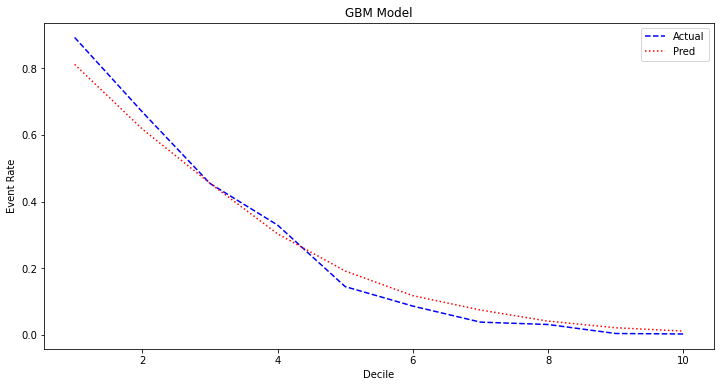

In [77]:
plt.figure(figsize = (12,6))
sns.lineplot(data = gbm_prob_dec, x = 'Decile', y = 'Actual Event Rate', label = 'Actual', color = 'blue', linestyle = 'dashed')
sns.lineplot(data = gbm_prob_dec, x = 'Decile', y = 'Pred Event Rate', label = 'Pred', color = 'red', linestyle = 'dotted')
plt.legend()
plt.title('GBM Model')
plt.ylabel('Event Rate')
plt.show()

#### Stacking Classifier Model Prob Deciles

In [78]:
y_pred_prob_sc = sc_model.predict_proba(X_Final)[:,1]
d4TelcoChurn['Pred Prob SC'] = pd.DataFrame(y_pred_prob_sc)
d4TelcoChurn['P_Rank_SC'] = pd.qcut(d4TelcoChurn['Pred Prob SC'].rank(method='first').values, 10, duplicates='drop').codes+1

rank_actuals_sc = d4TelcoChurn.groupby('P_Rank_SC')['Target'].agg(['count', 'mean'])
rank_pred_sc = d4TelcoChurn.groupby('P_Rank_SC')['Pred Prob SC'].agg(['mean'])

rank_actuals_sc.rename(columns = {'count': 'Count', 'mean': 'Actual Event Rate'},inplace = True)
rank_pred_sc.rename(columns = {'mean': 'Pred Event Rate'}, inplace=True)

rank_sc = pd.concat([rank_actuals_sc, rank_pred_sc], axis = 1, join = 'inner')

sorted_rank_sc = rank_sc.sort_values(by='P_Rank_SC', ascending = False)

sorted_rank_sc['No of Events'] = sorted_rank_sc['Count']*sorted_rank_sc['Actual Event Rate']
sorted_rank_sc['Cum Events'] = sorted_rank_sc['No of Events'].cumsum()
sorted_rank_sc['Events Captured'] = sorted_rank_sc['No of Events']/sum(sorted_rank_sc['No of Events'])
sorted_rank_sc['Cum Events Captured'] = sorted_rank_sc['Events Captured'].cumsum()

sorted_rank_sc['Non Events'] = sorted_rank_sc['Count']-sorted_rank_sc['No of Events']
sorted_rank_sc['Cum Non Events'] = sorted_rank_sc['Non Events'].cumsum()
sorted_rank_sc['Non Event Captured'] = sorted_rank_sc['Non Events']/sum(sorted_rank_sc['Non Events'])
sorted_rank_sc['Cum Non Event Captured'] = sorted_rank_sc['Non Event Captured'].cumsum()

sorted_rank_sc['Diff in Cap'] = round(sorted_rank_sc['Cum Events Captured']- sorted_rank_sc['Cum Non Event Captured'],4)
sorted_rank_sc['Random Cap'] = sorted_rank_sc['Count']/sum(sorted_rank_sc['Count'])

sc_prob_dec = sorted_rank_sc.reset_index()
sc_prob_dec['Decile'] = sc_prob_dec.index+1


sc_prob_dec

P_Rank_SC  Count  Actual Event Rate  Pred Event Rate  No of Events  \
0         10    705           0.812766         0.778114         573.0   
1          9    704           0.613636         0.600349         432.0   
2          8    704           0.450284         0.414563         317.0   
3          7    704           0.332386         0.267585         234.0   
4          6    704           0.205966         0.182260         145.0   
5          5    705           0.096454         0.129214          68.0   
6          4    704           0.096591         0.096182          68.0   
7          3    704           0.034091         0.074071          24.0   
8          2    704           0.011364         0.059766           8.0   
9          1    705           0.000000         0.053996           0.0   

   Cum Events  Events Captured  Cum Events Captured  Non Events  \
0       573.0         0.306581             0.306581       132.0   
1      1005.0         0.231140             0.537721       272.0   
2      1322.0         0.169609             0.707330       387.0   
3      1556.0         0.125201             0.832531       470.0   
4      1701.0         0.077582             0.910112       559.0   
5      1769.0         0.036383             0.946495       637.0   
6      1837.0         0.036383             0.982879       636.0   
7      1861.0         0.012841             0.995720       680.0   
8      1869.0         0.004280             1.000000       696.0   
9      1869.0         0.000000             1.000000       705.0   

   Cum Non Events  Non Event Captured  Cum Non Event Captured  Diff in Cap  \
0           132.0            0.025512                0.025512       0.2811   
1           404.0            0.052571                0.078083       0.4596   
2           791.0            0.074797                0.152880       0.5545   
3          1261.0            0.090839                0.243719       0.5888   
4          1820.0            0.108040                0.351759       0.5584   
5          2457.0            0.123116                0.474874       0.4716   
6          3093.0            0.122922                0.597797       0.3851   
7          3773.0            0.131426                0.729223       0.2665   
8          4469.0            0.134519                0.863742       0.1363   
9          5174.0            0.136258                1.000000       0.0000   

   Random Cap  Decile  
0    0.100099       1  
1    0.099957       2  
2    0.099957       3  
3    0.099957       4  
4    0.099957       5  
5    0.100099       6  
6    0.099957       7  
7    0.099957       8  
8    0.099957       9  
9    0.100099      10

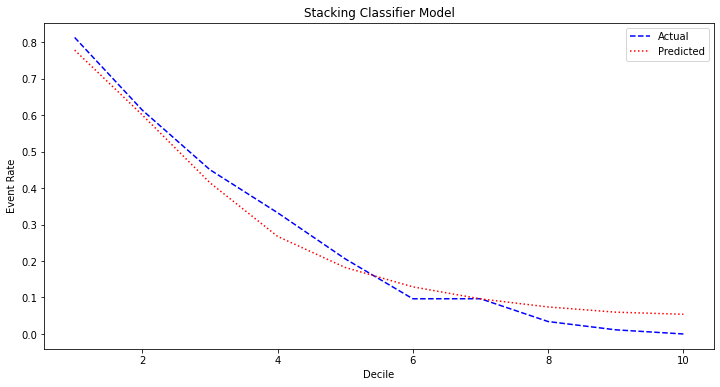

In [79]:
plt.figure(figsize = (12,6))
sns.lineplot(data = sc_prob_dec, x = 'Decile', y = 'Actual Event Rate', label = 'Actual', color = 'blue', linestyle = 'dashed')
sns.lineplot(data = sc_prob_dec, x = 'Decile', y = 'Pred Event Rate', label = 'Predicted', color = 'red', linestyle = 'dotted')
plt.ylabel('Event Rate')
plt.title('Stacking Classifier Model')
plt.legend()
plt.show()

### Observations

###### The Logistic Regression Model and Stacking Classifier Model seem to be have outperformed other models based on Accuracy and F1 Scores. The Logistic Regression Model has slightly edged out the Stacking Classifier Model based on the printed metrics. Based on event capture rate the Logistic Regression Model graph seems to be much more inline with the actual target results.  If the Stacking Classifier model is used - that would also be an acceptable choice. 

###### Do note - the other models are not far behind the LogReg and Stacking Classifier models and it would not be a bad idea to cross verify performance of these models time to time against the LogReg Model. 

#### Comparing Feature Importances across models

In [80]:
logreg_feats = coeff_lrm
logreg_feats['Coeff Est Abs'] = abs(logreg_feats['Coefficient Estimates'])
logreg_feats_sorted = logreg_feats.sort_values(by = 'Coeff Est Abs', ascending = False)
logreg_feats_sorted.reset_index(inplace = True, drop = True)
logreg_feats_sorted['LR Feat Imp Pts'] = logreg_feats_sorted.index
logreg_feats_sorted.rename(columns = {'Features' : 'Feature'}, inplace = True)

logreg_feats_sorted

Feature  Coefficient Estimates  \
0                       Contract_Two year              -0.657406   
1             InternetService_Fiber optic               0.592906   
2                      OnlineSecurity_Yes              -0.582911   
3                         TechSupport_Yes              -0.499312   
4                    PaperlessBilling_Yes               0.495657   
5                       Contract_One year              -0.343342   
6                           SeniorCitizen               0.288407   
7                        OnlineBackup_Yes              -0.264383   
8          PaymentMethod_Electronic check               0.252815   
9                          Dependents_Yes              -0.193457   
10       OnlineBackup_No internet service              -0.167138   
11    StreamingMovies_No internet service              -0.167138   
12                     InternetService_No              -0.167138   
13     OnlineSecurity_No internet service              -0.167138   
14        StreamingTV_No internet service              -0.167138   
15        TechSupport_No internet service              -0.167138   
16   DeviceProtection_No internet service              -0.167138   
17  PaymentMethod_Credit card (automatic)              -0.159721   
18                                 tenure              -0.064251   
19                            Partner_Yes               0.059622   
20                   DeviceProtection_Yes              -0.026097   
21             PaymentMethod_Mailed check              -0.003451   
22                         MonthlyCharges               0.001304   
23                           TotalCharges               0.000376   

    Coeff Est Abs  LR Feat Imp Pts  
0        0.657406                0  
1        0.592906                1  
2        0.582911                2  
3        0.499312                3  
4        0.495657                4  
5        0.343342                5  
6        0.288407                6  
7        0.264383                7  
8        0.252815                8  
9        0.193457                9  
10       0.167138               10  
11       0.167138               11  
12       0.167138               12  
13       0.167138               13  
14       0.167138               14  
15       0.167138               15  
16       0.167138               16  
17       0.159721               17  
18       0.064251               18  
19       0.059622               19  
20       0.026097               20  
21       0.003451               21  
22       0.001304               22  
23       0.000376               23

In [81]:
dt_feat_imp = pd.DataFrame(dt_model_final.feature_importances_, index = X_Train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
dt_feat_imp.reset_index(inplace=True)
dt_feat_imp['DT Feat Imp Pts'] = dt_feat_imp.index
dt_feat_imp.rename(columns = {'index': 'Feature', 'Importance':'DT Feat Imp'}, inplace = True)
dt_feat_imp

Feature  DT Feat Imp  DT Feat Imp Pts
0                                  tenure     0.378117                0
1             InternetService_Fiber optic     0.323850                1
2                            TotalCharges     0.104953                2
3                          MonthlyCharges     0.052274                3
4                       Contract_Two year     0.042077                4
5      OnlineSecurity_No internet service     0.029491                5
6          PaymentMethod_Electronic check     0.026451                6
7                    PaperlessBilling_Yes     0.018953                7
8                       Contract_One year     0.008508                8
9                      OnlineSecurity_Yes     0.007072                9
10                        TechSupport_Yes     0.006125               10
11  PaymentMethod_Credit card (automatic)     0.002129               11
12        TechSupport_No internet service     0.000000               12
13                            Partner_Yes     0.000000               13
14        StreamingTV_No internet service     0.000000               14
15    StreamingMovies_No internet service     0.000000               15
16                   DeviceProtection_Yes     0.000000               16
17   DeviceProtection_No internet service     0.000000               17
18                       OnlineBackup_Yes     0.000000               18
19       OnlineBackup_No internet service     0.000000               19
20             PaymentMethod_Mailed check     0.000000               20
21                     InternetService_No     0.000000               21
22                         Dependents_Yes     0.000000               22
23                          SeniorCitizen     0.000000               23

In [82]:
rf_feat_imp = rf_feature_importances.reset_index()
rf_feat_imp['RF Feat Imp Pts'] = rf_feat_imp.index
rf_feat_imp.rename(columns = {'index' : 'Feature', 'Importance': 'RF Feat Imp'}, inplace = True)
rf_feat_imp

Feature  RF Feat Imp  RF Feat Imp Pts
0                                  tenure     0.208651                0
1                            TotalCharges     0.122306                1
2          PaymentMethod_Electronic check     0.119652                2
3             InternetService_Fiber optic     0.115178                3
4                       Contract_Two year     0.101388                4
5                          MonthlyCharges     0.056235                5
6                      OnlineSecurity_Yes     0.033823                6
7                       Contract_One year     0.032690                7
8                         TechSupport_Yes     0.025470                8
9         TechSupport_No internet service     0.021210                9
10     OnlineSecurity_No internet service     0.019444               10
11        StreamingTV_No internet service     0.018662               11
12                     InternetService_No     0.017091               12
13                   PaperlessBilling_Yes     0.016183               13
14    StreamingMovies_No internet service     0.015889               14
15   DeviceProtection_No internet service     0.015662               15
16                       OnlineBackup_Yes     0.012979               16
17       OnlineBackup_No internet service     0.010936               17
18                          SeniorCitizen     0.008768               18
19  PaymentMethod_Credit card (automatic)     0.007680               19
20                   DeviceProtection_Yes     0.006471               20
21                         Dependents_Yes     0.006175               21
22                            Partner_Yes     0.004683               22
23             PaymentMethod_Mailed check     0.002775               23

In [83]:
gbm_feat_imp = gbm_feature_importances.reset_index()
gbm_feat_imp['GBM Feat Imp Pts'] = gbm_feat_imp.index
gbm_feat_imp.rename(columns = {'index': 'Feature', 'Importance' : 'GBM Feat Imp'}, inplace=True)
gbm_feat_imp

Feature  GBM Feat Imp  GBM Feat Imp Pts
0                                  tenure        0.2597                 0
1                            TotalCharges        0.1862                 1
2             InternetService_Fiber optic        0.1811                 2
3                          MonthlyCharges        0.1706                 3
4          PaymentMethod_Electronic check        0.0437                 4
5                       Contract_Two year        0.0370                 5
6                       Contract_One year        0.0251                 6
7                    PaperlessBilling_Yes        0.0230                 7
8                      OnlineSecurity_Yes        0.0144                 8
9                         TechSupport_Yes        0.0108                 9
10                          SeniorCitizen        0.0086                10
11                       OnlineBackup_Yes        0.0084                11
12                         Dependents_Yes        0.0067                12
13        TechSupport_No internet service        0.0064                13
14        StreamingTV_No internet service        0.0027                14
15  PaymentMethod_Credit card (automatic)        0.0027                15
16     OnlineSecurity_No internet service        0.0026                16
17   DeviceProtection_No internet service        0.0025                17
18                   DeviceProtection_Yes        0.0021                18
19             PaymentMethod_Mailed check        0.0018                19
20                            Partner_Yes        0.0015                20
21                     InternetService_No        0.0015                21
22    StreamingMovies_No internet service        0.0008                22
23       OnlineBackup_No internet service        0.0003                23

In [84]:
feat_imp_all = pd.merge(logreg_feats_sorted, dt_feat_imp, on = 'Feature').merge(rf_feat_imp, on ='Feature').merge(gbm_feat_imp, on ='Feature')
feat_imp_all["Total Feat Points"] = feat_imp_all['LR Feat Imp Pts']+feat_imp_all['DT Feat Imp Pts']+feat_imp_all['RF Feat Imp Pts']+feat_imp_all['GBM Feat Imp Pts']
feat_imp_all
feat_imp_sorted = feat_imp_all.sort_values(by = 'Total Feat Points')
feat_imp_sorted.reset_index(inplace=True, drop = True)
feat_imp_sorted

Feature  Coefficient Estimates  \
0             InternetService_Fiber optic               0.592906   
1                       Contract_Two year              -0.657406   
2                                  tenure              -0.064251   
3          PaymentMethod_Electronic check               0.252815   
4                      OnlineSecurity_Yes              -0.582911   
5                       Contract_One year              -0.343342   
6                            TotalCharges               0.000376   
7                         TechSupport_Yes              -0.499312   
8                    PaperlessBilling_Yes               0.495657   
9                          MonthlyCharges               0.001304   
10     OnlineSecurity_No internet service              -0.167138   
11        TechSupport_No internet service              -0.167138   
12                       OnlineBackup_Yes              -0.264383   
13        StreamingTV_No internet service              -0.167138   
14                          SeniorCitizen               0.288407   
15  PaymentMethod_Credit card (automatic)              -0.159721   
16    StreamingMovies_No internet service              -0.167138   
17                         Dependents_Yes              -0.193457   
18   DeviceProtection_No internet service              -0.167138   
19                     InternetService_No              -0.167138   
20       OnlineBackup_No internet service              -0.167138   
21                            Partner_Yes               0.059622   
22                   DeviceProtection_Yes              -0.026097   
23             PaymentMethod_Mailed check              -0.003451   

    Coeff Est Abs  LR Feat Imp Pts  DT Feat Imp  DT Feat Imp Pts  RF Feat Imp  \
0        0.592906                1     0.323850                1     0.115178   
1        0.657406                0     0.042077                4     0.101388   
2        0.064251               18     0.378117                0     0.208651   
3        0.252815                8     0.026451                6     0.119652   
4        0.582911                2     0.007072                9     0.033823   
5        0.343342                5     0.008508                8     0.032690   
6        0.000376               23     0.104953                2     0.122306   
7        0.499312                3     0.006125               10     0.025470   
8        0.495657                4     0.018953                7     0.016183   
9        0.001304               22     0.052274                3     0.056235   
10       0.167138               13     0.029491                5     0.019444   
11       0.167138               15     0.000000               12     0.021210   
12       0.264383                7     0.000000               18     0.012979   
13       0.167138               14     0.000000               14     0.018662   
14       0.288407                6     0.000000               23     0.008768   
15       0.159721               17     0.002129               11     0.007680   
16       0.167138               11     0.000000               15     0.015889   
17       0.193457                9     0.000000               22     0.006175   
18       0.167138               16     0.000000               17     0.015662   
19       0.167138               12     0.000000               21     0.017091   
20       0.167138               10     0.000000               19     0.010936   
21       0.059622               19     0.000000               13     0.004683   
22       0.026097               20     0.000000               16     0.006471   
23       0.003451               21     0.000000               20     0.002775   

    RF Feat Imp Pts  GBM Feat Imp  GBM Feat Imp Pts  Total Feat Points  
0                 3        0.1811                 2                  7  
1                 4        0.0370                 5                 13  
2                 0        0.2597                 0                 18  
3              

#### Table above shows the rank of the feature across all the four models feature importances. 
#### Column 'Total Feat Points' shows the points aggregated for all the models by a Feature.

### Note : Feature are ranked in descending order - points are also in descending order. So, the lowest point total is the most important feature taking the average of all models. 

### Observations

##### The LogistIc Regression Model - though it is the best performer - based on the coefficient estimates, feature importances are completely different from the other 3 models. The other 3 models depict similar feature importances amongst themselves unlike LogReg.

1. InternetService_FiberOptic - is a common feature in the top 3 feature importances across all 4 models
2. Contract_TwoYear - is a common feature in the top 5 feature importances across all 5 models
3. Tenure - though scoring very low in the Logistic Regression model for co-efficients, is at number 1 on the other 3 models.
4. Total Charges - though scoring very low in the Logistic Regression model for co-efficients is at number 2 or 3 in the the other 3 models. Monthly charges scores very low on the Logistic Regression model but is either number 3 or number 5 on the other 3 models.




In [85]:
d4TelcoChurn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  Target  Pred Prob LogReg  \
0              29.85         29.85    No       0          0.567333   
1              56.95       1889.50    No       0          0.068213   
2              53.85        108.15   Yes       1          0.347208   
3              42.30       1840.75    No       0          0.020744   
4              70.70        151.65   Yes       1          0.750908   
...              ...           ...   ...     ...               ...   
7038           84.80       1990.50    No       0          0.115561   
7039      

In [86]:
d4TelcoChurn['Tenure_Rank'] = pd.qcut(d4TelcoChurn['tenure'].rank(method='first').values, 10, duplicates='drop').codes+1
tenure_rank = d4TelcoChurn.groupby('Tenure_Rank')['tenure'].agg(['min', 'max', 'mean'])
tenure_rank

min  max       mean
Tenure_Rank                     
1              0    2   1.099291
2              2    6   3.566761
3              6   12   8.779830
4             12   20  15.531250
5             20   29  24.153191
6             29   40  34.004261
7             40   50  45.014205
8             50   60  55.370739
9             60   69  65.001420
10            69   72  71.191489

In [87]:
d4TelcoChurn['tenure'].mean()

32.37114865824223

In [88]:
d4TelcoChurn['Tenure Segment'] = np.where(d4TelcoChurn['Tenure_Rank'] <= 6, 'Low Tenure', 'High Tenure')
d4TelcoChurn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  Target  Pred Prob LogReg  \
0              29.85         29.85    No       0          0.567333   
1              56.95       1889.50    No       0          0.068213   
2              53.85        108.15   Yes       1          0.347208   
3              42.30       1840.75    No       0          0.020744   
4              70.70        151.65   Yes       1          0.750908   
...              ...           ...   ...     ...               ...   
7038           84.80       1990.50    No       0          0.115561   
7039      

In [89]:
d4TelcoChurn['Total Charges Rank'] = pd.qcut(d4TelcoChurn['TotalCharges'].rank(method='first').values, 10, duplicates = 'drop').codes+1
total_charges = d4TelcoChurn.groupby('Total Charges Rank')['TotalCharges'].agg(['min','max', 'mean'])
total_charges

min      max         mean
Total Charges Rank                               
1                     18.80    83.40    48.527234
2                     83.75   265.30   166.060227
3                    265.35   547.80   398.534517
4                    548.80   939.70   741.142045
5                    939.80  1394.55  1167.725248
6                   1395.05  2043.45  1688.916619
7                   2044.75  3132.75  2570.101918
8                   3132.75  4469.10  3786.084872
9                   4473.00  5971.25  5208.207528
10                  5974.30  8684.80  7020.704539

In [90]:
d4TelcoChurn['TotalCharges'].mean()

2279.7989919068614

In [91]:
d4TelcoChurn['Total Charges Segment'] = np.where(d4TelcoChurn['Total Charges Rank'] <= 7, 'Low Total Charges', 'High Total Charges')

In [92]:
d4TelcoChurn['Monthly Charges Rank'] = pd.qcut(d4TelcoChurn['MonthlyCharges'].rank(method='first').values, 10, duplicates = 'drop').codes+1
monthly_charges = d4TelcoChurn.groupby('Monthly Charges Rank')['MonthlyCharges'].agg(['min', 'max', 'mean'])
monthly_charges

min     max        mean
Monthly Charges Rank                            
1                      18.25   20.05   19.622482
2                      20.05   25.05   21.732599
3                      25.05   45.85   35.514773
4                      45.85   58.75   52.532244
5                      58.85   70.35   65.314965
6                      70.35   79.10   74.623864
7                      79.10   85.50   82.140057
8                      85.50   94.25   89.840199
9                      94.25  102.60   98.036364
10                    102.60  118.75  108.260922

In [93]:
d4TelcoChurn['MonthlyCharges'].mean()

64.76169246059922

In [94]:
d4TelcoChurn['Monthly Charges Segment'] = np.where(d4TelcoChurn['Monthly Charges Rank'] <= 5, 'Low Monthly Charges', 'High Monthly Charges')
d4TelcoChurn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  Target  Pred Prob LogReg  \
0              29.85         29.85    No       0          0.567333   
1              56.95       1889.50    No       0          0.068213   
2              53.85        108.15   Yes       1          0.347208   
3              42.30       1840.75    No       0          0.020744   
4              70.70        151.65   Yes       1          0.750908   
...              ...           ...   ...     ...               ...   
7038           84.80       1990.50    No       0          0.115561   
7039      

### Observation

#### After having studied the feature importances across models, the accuracy scores and f1 scores of all models - decided to use the GBM model for prediction instead since - 

#### 1. The GBM model was not far behind the Logistic Regression model in the printed metrics of accuracy and f1. 
#### 2. The GBM model graph of predicted versus actual results, is fairly accurate. It is not as clean as the Logistic Regression and Decision Tree models but still acceptable. In fact, the Decision Tree model may be prone to over fitting in actual deployment.
#### 3. Since the Logistic Regression model features were very different from the other 3 models, it may be safer to use one of the 3 models where the feature importances are similar. It would be a good idea to conduct further experiments with new data on all the models and check if the Logistic Regression model consistently outperforms other models or not. 

## Slice the data based on the churn probability - Get Top 3 Probability ranks from Gradient Boosting Model

In [95]:
d4TelcoChurn['Predicted Churn Rank'] = np.where(d4TelcoChurn['P_Rank_GBM'] >= 8, 'Top 3', 'Bottom 7')


In [96]:
d4TelcoChurn_top3 = d4TelcoChurn.loc[d4TelcoChurn['Predicted Churn Rank']== 'Top 3']
d4TelcoChurn_top3

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2     3668-QPYBK    Male              0      No         No       2   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
8     7892-POOKP  Female              0     Yes         No      28   
...          ...     ...            ...     ...        ...     ...   
7025  2823-LKABH  Female              0      No         No      18   
7029  2235-DWLJU  Female              1      No         No       6   
7032  6894-LFHLY    Male              1      No         No       1   
7034  0639-TSIQW  Female              0      No         No      67   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
2             Yes                No             DSL            Yes   
4             Yes                No     Fiber optic             No   
5             Yes               Yes     Fiber optic             No   
6             Yes               Yes     Fiber optic             No   
8             Yes               Yes     Fiber optic             No   
...           ...               ...             ...            ...   
7025          Yes               Yes     Fiber optic             No   
7029           No  No phone service             DSL             No   
7032          Yes               Yes     Fiber optic             No   
7034          Yes               Yes     Fiber optic            Yes   
7041          Yes               Yes     Fiber optic             No   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
2             Yes               No          No          No              No   
4              No               No          No          No              No   
5              No              Yes          No         Yes             Yes   
6             Yes               No          No         Yes              No   
8              No              Yes         Yes         Yes             Yes   
...           ...              ...         ...         ...             ...   
7025           No              Yes         Yes          No             Yes   
7029           No               No          No         Yes             Yes   
7032           No               No          No          No              No   
7034          Yes              Yes          No         Yes              No   
7041           No               No          No          No              No   

            Contract PaperlessBilling              PaymentMethod  \
2     Month-to-month              Yes               Mailed check   
4     Month-to-month              Yes           Electronic check   
5     Month-to-month              Yes           Electronic check   
6     Month-to-month              Yes    Credit card (automatic)   
8     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7025  Month-to-month              Yes  Bank transfer (automatic)   
7029  Month-to-month              Yes           Electronic check   
7032  Month-to-month              Yes           Electronic check   
7034  Month-to-month              Yes    Credit card (automatic)   
7041  Month-to-month              Yes               Mailed check   

      MonthlyCharges  TotalCharges Churn  Target  Pred Prob LogReg  \
2              53.85        108.15   Yes       1          0.347208   
4              70.70        151.65   Yes       1          0.750908   
5              99.65        820.50   Yes       1          0.727311   
6              89.10       1949.40    No       0          0.412848   
8             104.80       3046.05   Yes       1          0.524870   
...              ...           ...   ...     ...               ...   
7025           95.05       1679.40    No       0          0.475826   
7029      

In [97]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']

total=service_list+target
total

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'target']

In [98]:
d4TCoChurn_services_top3 = d4TelcoChurn_top3[service_list]
d4TCoChurn_services_top3

PhoneService     MultipleLines InternetService OnlineSecurity  \
2             Yes                No             DSL            Yes   
4             Yes                No     Fiber optic             No   
5             Yes               Yes     Fiber optic             No   
6             Yes               Yes     Fiber optic             No   
8             Yes               Yes     Fiber optic             No   
...           ...               ...             ...            ...   
7025          Yes               Yes     Fiber optic             No   
7029           No  No phone service             DSL             No   
7032          Yes               Yes     Fiber optic             No   
7034          Yes               Yes     Fiber optic            Yes   
7041          Yes               Yes     Fiber optic             No   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
2             Yes               No          No          No              No   
4              No               No          No          No              No   
5              No              Yes          No         Yes             Yes   
6             Yes               No          No         Yes              No   
8              No              Yes         Yes         Yes             Yes   
...           ...              ...         ...         ...             ...   
7025           No              Yes         Yes          No             Yes   
7029           No               No          No         Yes             Yes   
7032           No               No          No          No              No   
7034          Yes              Yes          No         Yes              No   
7041           No               No          No          No              No   

            Contract PaperlessBilling  
2     Month-to-month              Yes  
4     Month-to-month              Yes  
5     Month-to-month              Yes  
6     Month-to-month              Yes  
8     Month-to-month              Yes  
...              ...              ...  
7025  Month-to-month              Yes  
7029  Month-to-month              Yes  
7032  Month-to-month              Yes  
7034  Month-to-month              Yes  
7041  Month-to-month              Yes  

[2113 rows x 11 columns]

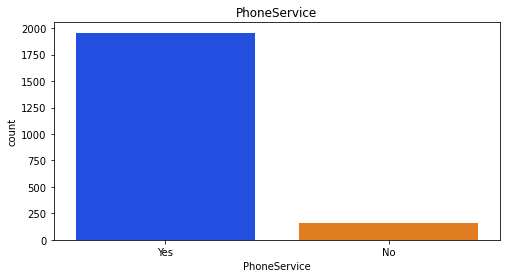

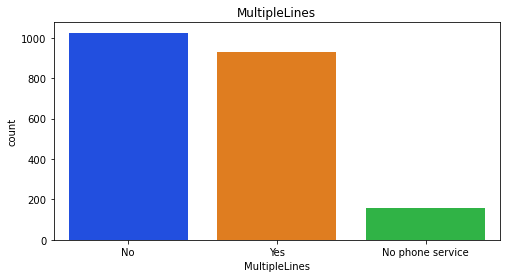

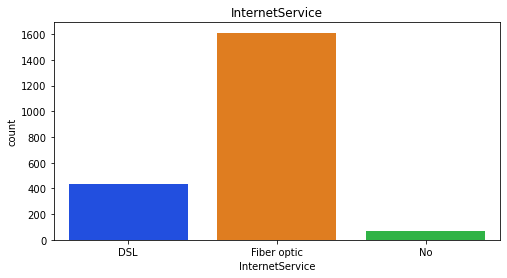

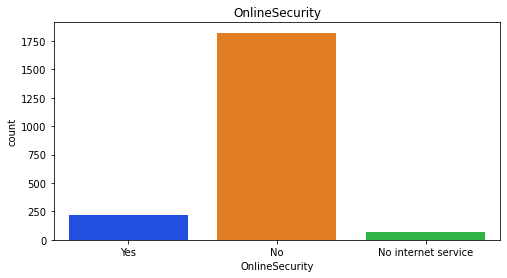

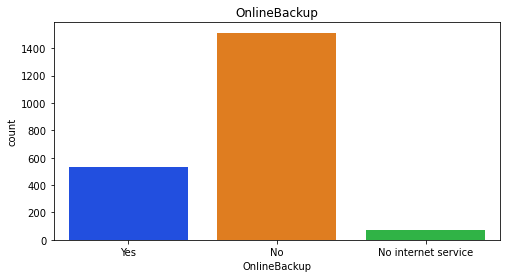

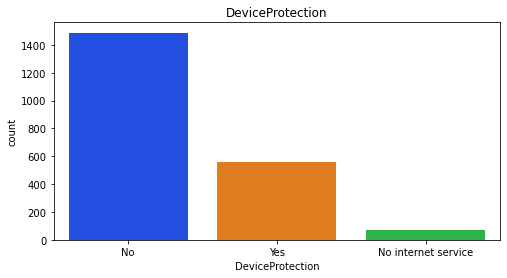

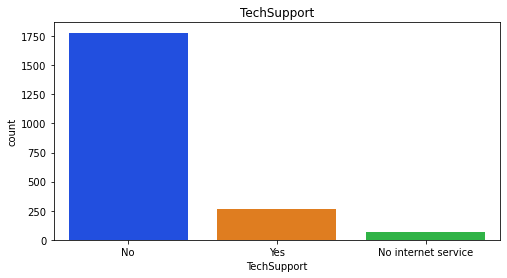

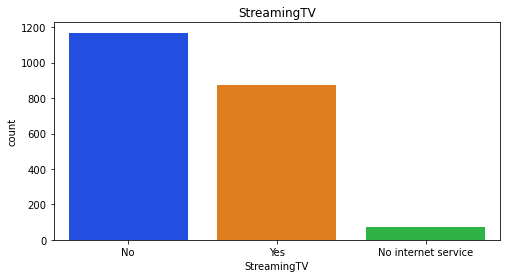

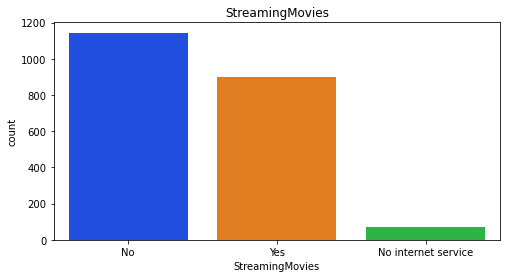

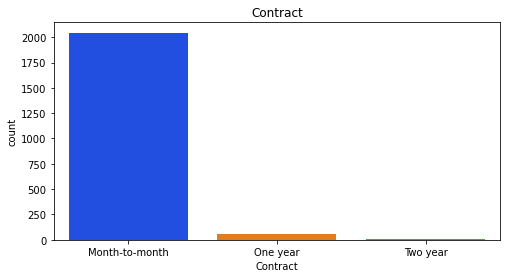

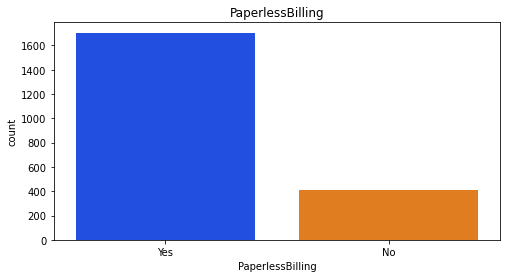

In [99]:
for col in d4TCoChurn_services_top3:
    plt.figure(figsize = (8,4))
    sns.countplot(data = d4TCoChurn_services_top3, x = col)
    plt.title(col)
plt.show()

In [100]:
month_charge_n_tenure_crosstab_mean = pd.crosstab(index=d4TelcoChurn_top3['Monthly Charges Segment'], columns = d4TelcoChurn['Tenure Segment'], values = d4TelcoChurn['MonthlyCharges'], aggfunc='mean')
month_charge_n_tenure_crosstab_mean

Tenure Segment           High Tenure  Low Tenure
Monthly Charges Segment                         
High Monthly Charges        98.94974   86.650231
Low Monthly Charges         42.52500   47.063047

In [101]:
month_charge_n_tenure_crosstab_count = pd.crosstab(index=d4TelcoChurn_top3['Monthly Charges Segment'], columns = d4TelcoChurn_top3['Tenure Segment'], values = d4TelcoChurn['MonthlyCharges'], aggfunc='count')
month_charge_n_tenure_crosstab_count

Tenure Segment           High Tenure  Low Tenure
Monthly Charges Segment                         
High Monthly Charges             192        1296
Low Monthly Charges                8         617

## Recommendations

#### 1. Increase in tenure results in reduction in attrition. From the count bar plot in cell 10, we can see an obvious spike in attrition on the left where churn spikes and tenure is low. On the right of the graph, we can see the tenure spiking and the attrition being low. We can see a gradual reduction in churn and gradual increase in tenure from left to right. 

#### We can also see that around the 15~20 year mark attrition rate reduces to around 25% which is roughly the mean attrition of the dataset. 

#### However, between years 1 to 2, the drop in attrition is drastic i.e. if the company is able to retain customers beyond the 2 year mark, the likelihood of the customers remaining long term clients shoots up. 

### We recommend a strategy catered specifically to clients whose tenure is below 2 years to ensure they stay past that 2 year mark. Some suggestions are - 

#### (i) Introduction of free peripheral services every month. Start with the cheapest services and free for a period of 1 year. With such a strategy, the more expensive and popular services will come into effect later in the marketing cycle and their expiry will co-incide closer to the 2 year tenure mark. This strategy would also ensure that the client has been using services for more than a year and will be (a) More willing to pay for the peripheral services after expiry (b) Due to familiarity with the services and the company - resistant to switching service providers.

#### If accepted, Operations and Marketing will need to extract the services that will be the least cost intensive with the maximum loyalty effect on customers. 

#### 2. Total charges - though high on the feature importances list - reveals an interesting trend. The customers with the lowest charges tend to have the highest churn. Refer to histogram in cell 14. We can infer from this that these are clients who do not wish to pay even minimal charges i.e. if they can avail of the services for free they are willing to continue (and maybe signed up for the services with the intent of continuing only for the free period). 

### The company can target clients who currently have no charges but will soon be billed their first statement. 

#### Instead of non-human correspondence(email, app notifications etc) - for such clients - it may be worthwhile to make a human call to inform of the first bill statement which is upcoming and to gauge customers reactions and feedback. Questions that can be asked are - 

#### (a) If the services rendered were satisfactory and if not, what could be better?
#### (b) If the customer found the services worth the price and if not, what is it they find reasonable. 
#### (c) If they would recommend the services to others(round-about way of gauging their interest in continuing the services)
#### (d) If the customer shows hesitation in continuing the services, try and get feedback on what would get them to stay. 

#### 3. Monthly charges seem to show high churn in the beginning (and same strategy as being used for Total Charges will apply here. But another interesting trend seen from histogram in cell 14 is that between 70 and 100 dollars monthly charges the churn rate seems to go up giving insight into the fact that customers do not want to spend that much on their telecom services. 

### A good strategy would be to offer services for cheaper once a customer crosses the US Dollar 60 threshold i.e. for example a customer is at 60 dollars monthly charges and wishes to procure further services of 25 dollars - offer a discount on the 25 dollar services to dollar 15 so that the total monthly charges works out to us dollars 75 instead of dollars 85. Continue this strategy till customer has moved out of the 70 to 100 dollar range. 

### With this strategy - though the customer will still end up spending more than they would like - this will be negated by the fact that they will feel satisfied that they are getting more value for money.


#### 4. If the customer has Fiber Optic as their internet service, they tend to churn more. 

####  Design a survey to understand the reason for this - is it bad service/connection or speed, is it high charges, customer support issues? Once the reasons are understood, the respective teams need to improve this service. 

#### Note that - on DSL service though the churn rate is lower, it is still higher at 33% than the mean churn rate of 26%. Which means that customers are not all that happy with the DSL service either. A survey should be designed to understand the issues with the DSL service also - either simultaneously with the Fiber Optic service or seperately. And this needs to be worked on. 

#### The customers with no internet service from the company have the least churn, which is troubling. 

#### It does not seem like a good idea to try and switch Fiber Optic customers to DSL because (a) DSL is inherently slower and customers who have enrolled for the fiber optic service are looking for faster internet. Switching them to DSL will excaberate the situation. (b) DSL customers also are showing higher than mean churn and overloading the DSL service may cause unforeseen issues which may be even more critical than the Fiber Optic service issues. 

### The only real solution is to improve the internet services based on customer feedback. 

#### 5. Two Year contract clients seem to have very high churn. Design a feedback survey to understand the underlying causes. Is it due to the fact that the contract is not worth the service? Do the customers find the contract length too long to be locked into the service and feel restricted in exploring newer services and plans once they become available? Or is it that these customers were not happy with the service anyway and were only waiting for the contract period to expire before terminating services?

### Explore the pros and cons of taking the two year contract off the list of contracts offered. 

#### 6. It is obvious from the graphs in cell 33 that customers with no Online Security, Online Backup and Device Security from the company tend to churn more. 

### Push these services with customers to improve their overall satisfaction with the company. In fact, these services may be packaged free for a longer than normal trial period along with recommendations in Pt. 1 above to gain a compounding effect. 